In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib_inline.backend_inline
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
import time

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge')
os.chdir(WD)
TEMPDIR = WD.parent / 'BROWN_COSMOS'

RECALCULATE_TEMPFILT = False

In [4]:
params = {}
params['FILTERS_RES']       = "data/filters/FILTER.RES+SPHEREx+7DT_reduced.res"
params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMP_ERR_FILE']     = "../template_error_cosmos2020.txt"
params['TEMP_ERR_A2']       = 0.0 # nullify the template error

params['SYS_ERR']           = 0.01

params['MW_EBV']            = 0.016577
params['CAT_HAS_EXTCORR']   = False

params['CATALOG_FILE']      = "data/input/GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits" 
# catalog_file = WD/"data"/"input"/"GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits"
dir_output = WD/"output"/"output_GAMA_COSMOS_7DS_SPHEREx"

if not dir_output.exists():
    dir_output.mkdir(parents=True)
params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = "output"

params['APPLY_PRIOR']       = True
params['PRIOR_FILE']        = "../prior_K_TAO.dat"
params['PRIOR_FILTER']      = 466  # SPHEREx band corresponding to the K-band
params['PRIOR_ABZP']        = 23.9
params['PRIOR_FLOOR']       = 0.01

params['FIX_ZSPEC']         = False
params['Z_MIN']             = 0.002
params['Z_MAX']             = 5.8
params['Z_STEP']            = 0.01
params['Z_STEP_TYPE']       = 1

translate_filename = 'dummy.translate'

params_GAMA_COSMOS_7DS_SPHEREx = params.copy()

In [5]:
params['CATALOG_FILE']      = "data/input/COSMOS_input_7DS_IMS_SPHEREx_deep.fits"
dir_output = WD/"output"/"output_COSMOS_7DS_IMS_SPHEREx_deep"
dir_output.mkdir(parents=True, exist_ok=True)
params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params_COSMOS_7DS_IMS_SPHEREx_deep = params.copy()

params['CATALOG_FILE']      = "data/input/GAMA_COSMOS_input_SPHEREx.fits"
dir_output = WD/"output"/"output_GAMA_COSMOS_SPHEREx"
dir_output.mkdir(parents=True, exist_ok=True)
params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params_GAMA_COSMOS_SPHEREx = params.copy()

In [27]:
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, n_proc=60,
                        params=params_GAMA_COSMOS_7DS_SPHEREx)

with open('data/tempfilt_SPHEREx+7DS.pickle', 'wb') as wfile:
   pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits
   >>> NOBJ = 210165
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443

100%|██████████| 160/160 [02:16<00:00,  1.17it/s]


Template   0: NGC_4826_spec.dat (NZ=1).
Template   1: NGC_4385_spec.dat (NZ=1).
Template   2: NGC_5104_spec.dat (NZ=1).
Template   3: UGC_09618_S_spec.dat (NZ=1).
Template   4: NGC_0337_spec.dat (NZ=1).
Template   5: NGC_4138_spec.dat (NZ=1).
Template   6: UGCA_219_spec.dat (NZ=1).
Template   7: NGC_1275_spec.dat (NZ=1).
Template   8: NGC_3627_spec.dat (NZ=1).
Template   9: NGC_4194_spec.dat (NZ=1).
Template  10: UGC_05101_spec.dat (NZ=1).
Template  11: NGC_5033_spec.dat (NZ=1).
Template  12: IC_5298_spec.dat (NZ=1).
Template  13: IC_4051_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: UGC_06850_spec.dat (NZ=1).
Template  16: Arp_118_spec.dat (NZ=1).
Template  17: NGC_4458_spec.dat (NZ=1).
Template  18: NGC_5866_spec.dat (NZ=1).
Template  19: NGC_2537_spec.dat (NZ=1).
Template  20: NGC_4551_spec.dat (NZ=1).
Template  21: NGC_4550_spec.dat (NZ=1).
Template  22: CGCG_453-062_spec.dat (NZ=1).
Template  23: NGC_3379_spec.dat (NZ=1).
Template  24: Mrk_1490_spec.dat (NZ

192it [01:15,  2.53it/s]


In [28]:
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, n_proc=60,
                        params=params_GAMA_COSMOS_SPHEREx)

with open('data/tempfilt_SPHEREx.pickle', 'wb') as wfile:
   pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/GAMA_COSMOS_input_SPHEREx.fits
   >>> NOBJ = 210165
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (4

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  ../prior_K_TAO.dat
Template grid: BROWN_COSMOS.template (this may take some time)


100%|██████████| 160/160 [01:33<00:00,  1.71it/s]


Template   0: NGC_4826_spec.dat (NZ=1).
Template   1: NGC_4385_spec.dat (NZ=1).
Template   2: NGC_5104_spec.dat (NZ=1).
Template   3: UGC_09618_S_spec.dat (NZ=1).
Template   4: NGC_0337_spec.dat (NZ=1).
Template   5: NGC_4138_spec.dat (NZ=1).
Template   6: UGCA_219_spec.dat (NZ=1).
Template   7: NGC_1275_spec.dat (NZ=1).
Template   8: NGC_3627_spec.dat (NZ=1).
Template   9: NGC_4194_spec.dat (NZ=1).
Template  10: UGC_05101_spec.dat (NZ=1).
Template  11: NGC_5033_spec.dat (NZ=1).
Template  12: IC_5298_spec.dat (NZ=1).
Template  13: IC_4051_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: UGC_06850_spec.dat (NZ=1).
Template  16: Arp_118_spec.dat (NZ=1).
Template  17: NGC_4458_spec.dat (NZ=1).
Template  18: NGC_5866_spec.dat (NZ=1).
Template  19: NGC_2537_spec.dat (NZ=1).
Template  20: NGC_4551_spec.dat (NZ=1).
Template  21: NGC_4550_spec.dat (NZ=1).
Template  22: CGCG_453-062_spec.dat (NZ=1).
Template  23: NGC_3379_spec.dat (NZ=1).
Template  24: Mrk_1490_spec.dat (NZ

191it [00:55,  3.44it/s]


In [6]:
from utils import fit_catalog_single_template, fit_at_zbest_single_template
import logging

def get_pit(zspec, zgrid, lnp, trdz):
    """
    PIT function for evaluating the calibration of p(z), 
    as described in Tanaka (2017).
    """
    zspec_grid = np.dot(zspec[:,None], np.ones_like(zgrid)[None,:])
    zlim = zspec_grid >= zgrid
    pit = np.dot(np.exp(lnp)*zlim, trdz)
    
    return pit


def get_crps(zspec, zgrid, lnp, trdz):
    """
    CRPS function for evaluating the calibration of p(z), 
    as described in Tanaka (2017).
    """
    from tqdm import trange
    crps= np.empty(len(lnp), dtype=float)
    for i in trange(len(lnp), desc='Calculating CRPS'):
        zzgrid = np.dot(zgrid[:,None], np.ones_like(zgrid)[None,:])
        lnpgrid = np.dot(np.ones_like(zgrid)[:,None], lnp[i][None,:])
        zlim = zzgrid >= zgrid
        h = np.zeros_like(zgrid)
        h[zgrid >= zspec[i]] = 1
        pit = np.dot(np.exp(lnpgrid)*zlim, trdz)
        crps[i] = np.dot((pit-h)**2, trdz)
    
    return crps


def fit_and_save_result_prior(params, tempfilt, logger, n_proc=1, rerun=False, run_single_template=True):
    start = time.time()
    logger.info(f'Running fit_and_save_result_prior with {n_proc} processes')
    
    dir_output = Path(params['OUTPUT_DIRECTORY'])

    base = Table.read(params['CATALOG_FILE'])
    Ncat = len(base)
    Nbatch = np.ceil(Ncat/10000).astype(int)

    logger.info(f'Fitting {Ncat} objects in {Nbatch} batches ==')
    
    for i in range(Nbatch):
        iter_start = time.time()
        outtabpath = dir_output/f'output{i:02d}.fits'
        lnptabpath = dir_output/f'lnp{i:02d}.fits'
        
        if (outtabpath.exists() and lnptabpath.exists()) and (not rerun):
            logger.info(f'{i}th batch already exists ==============')
        else:
            logger.info(f'Fitting {i}th batch =====================')
            start_id = i * 10000
            end_id = (i+1) * 10000

            # initialize eazy object
            # (if initialized outside the loop, wiredly, it uses more and more processes in fit_at_zbest)
            ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                                zeropoint_file=None, params=params, tempfilt=tempfilt, )
            
            if end_id > len(ez.idx):
                end_id = len(ez.idx)

            if run_single_template:
                ez.ZML_WITH_PRIOR = True
                fit_catalog_single_template(ez, ez.idx[start_id:end_id], n_proc=n_proc, prior=True)
                ez.ZML_WITH_PRIOR = True
                fit_at_zbest_single_template(ez, prior=True, nproc=1)
            else:
                ez.fit_catalog(ez.idx[start_id:end_id], n_proc=n_proc, prior=True)
                ez.ZML_WITH_PRIOR = True
                ez.fit_at_zbest(prior=True, nproc=1)
                
            try:
                zlimits = ez.pz_percentiles(percentiles=[2.5,16,50,84,97.5],
                                                oversample=5)
            except:
                logger.debug('Couldn\'t compute pz_percentiles')
                zlimits = np.zeros((ez.NOBJ, 5), dtype=ez.ARRAY_DTYPE) - 1
                
            tab = Table()
            tab['id'] = ez.OBJID
            tab['z_phot'] = ez.zbest
            tab['z_phot_chi2'] = ez.chi2_best
            tab['z025'] = zlimits[:,0]
            tab['z160'] = zlimits[:,1]
            tab['z500'] = zlimits[:,2]
            tab['z840'] = zlimits[:,3]
            tab['z975'] = zlimits[:,4]
            
            pit = ez.PIT(ez.ZSPEC)
            tab['pit'] = pit
            
            crps = get_crps(ez.ZSPEC[start_id:end_id], ez.zgrid, ez.lnp[start_id:end_id], ez.trdz)
            tab['crps'] = np.empty(len(tab), dtype=float)
            tab['crps'][start_id:end_id] = crps
            
            tab[start_id:end_id].write(outtabpath, overwrite=True)
            phdu = fits.PrimaryHDU(data=ez.lnp[start_id:end_id])
            gridhdu = fits.ImageHDU(data=ez.zgrid)
            hdul = fits.HDUList([phdu, gridhdu])
            hdul.writeto(lnptabpath, overwrite=True)
            del tab, phdu, gridhdu, hdul
            gc.collect()
            iter_end = time.time()
            time_taken_hms = time.strftime('%H:%M:%S', time.gmtime(iter_end-iter_start))
            logger.info(f' --- finished {i}th batch in {time_taken_hms}')
    
    colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'pit', 'crps', 'id']
    for label in colnames:
        base[label] = np.empty(len(base), dtype=float)
        
    for i in range(Nbatch):
        start_id = i*10000
        end_id = (i+1)*10000 if i < Nbatch-1 else len(base)
        
        outtab = Table.read(dir_output/f'output{i:02d}.fits')
        for label in colnames:
            base[label][start_id:end_id] = outtab[label]
    
    base.write(dir_output/'result.fits', overwrite=True)
    
    end = time.time()
    time_taken_hms = time.strftime('%H:%M:%S', time.gmtime(end-start))
    logger.info(f'Finished in {time_taken_hms}')

In [7]:
with open('data/tempfilt_SPHEREx+7DS.pickle', 'rb') as rfile:
    tempfilt_SPHEREx_7DS = pickle.load(rfile)
    
with open('data/tempfilt_SPHEREx.pickle', 'rb') as rfile:
    tempfilt_SPHEREx = pickle.load(rfile)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
logger = logging.getLogger('3rd_challenge_eazy_run')
logger.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s :: %(levelname)s :: %(message)s')
handler_stream = logging.StreamHandler()
handler_stream.setLevel(logging.DEBUG)
handler_stream.setFormatter(formatter)
handler_file = logging.FileHandler(WD/'3rd_challenge_eazy_run.log')
handler_file.setFormatter(formatter)

logger.addHandler(handler_stream)
logger.addHandler(handler_file)

In [ ]:
logger.info(">>>> (re)starting GAMA_COSMOS_7DS_SPHEREx")
fit_and_save_result_prior(params_GAMA_COSMOS_7DS_SPHEREx, tempfilt_SPHEREx_7DS, logger)
logger.info(">>>> (re)starting COSMOS_7DS_IMS_SPHEREx_deep")
fit_and_save_result_prior(params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger)
logger.info(">>>> (re)starting GAMA_COSMOS_SPHEREx")
fit_and_save_result_prior(params_GAMA_COSMOS_SPHEREx, tempfilt_SPHEREx, logger)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)


/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.56it/s]
100%|██████████| 191/191 [00:00<00:00, 474.10it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=36)
Fit 1.1 s (n_proc=3, NOBJ=38)


/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/templates.py:104: RuntimeWarning: divide by zero encountered in divide
  lcz = np.atleast_1d(self.filter_wavelengths)/(1+z)
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/templates.py:105: RuntimeWarning: divide by zero encountered in divide
  tef_z = self._spline(np.atleast_1d(self.filter_wavelengths)/(1+z))
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/igm.py:193: RuntimeWarning: divide by zero encountered in scalar power
  return a**b
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:2701: RuntimeWarning: divide by zero encountered in divide
  flam_spec = utils.CLIGHT*1.e10/templz**2/1.e-19
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:2718: RuntimeWarning: invalid value encountered in multiply
  templf=templf*fnu_factor*flam_spec,
/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:2787: RuntimeWarning: invalid value encountered in multiply
  pl = ax.plot(tem

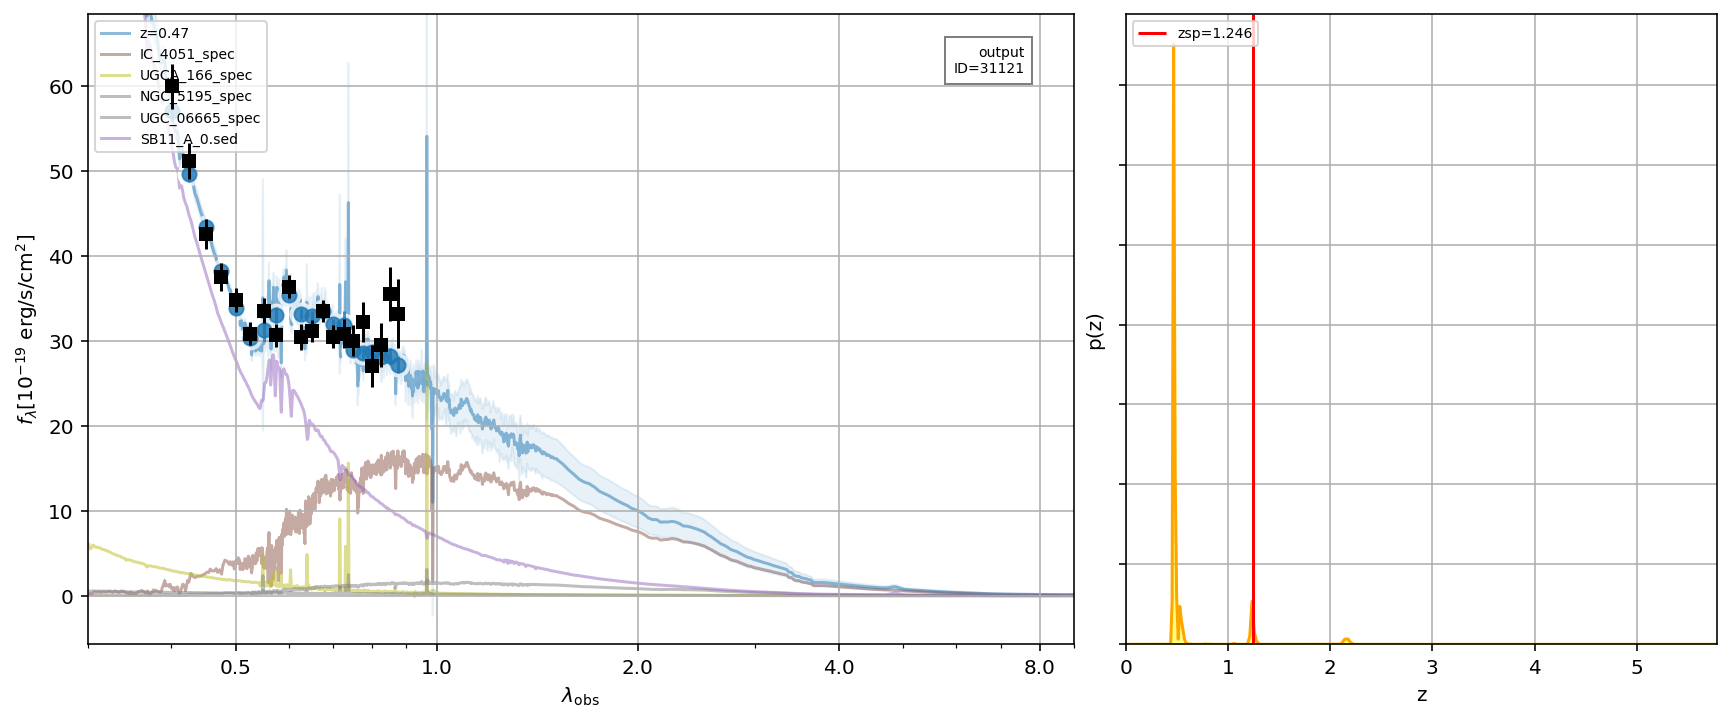

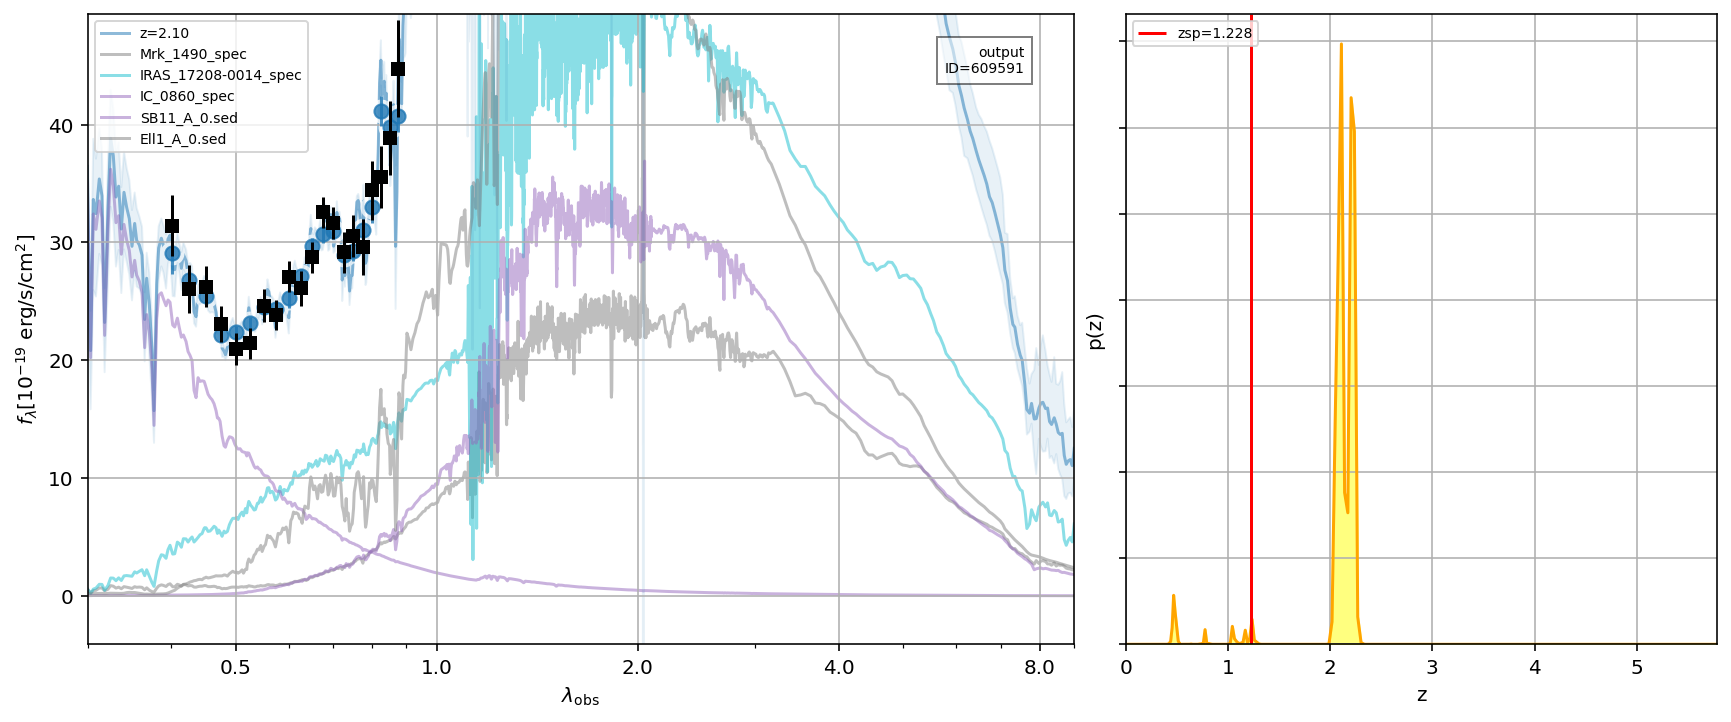

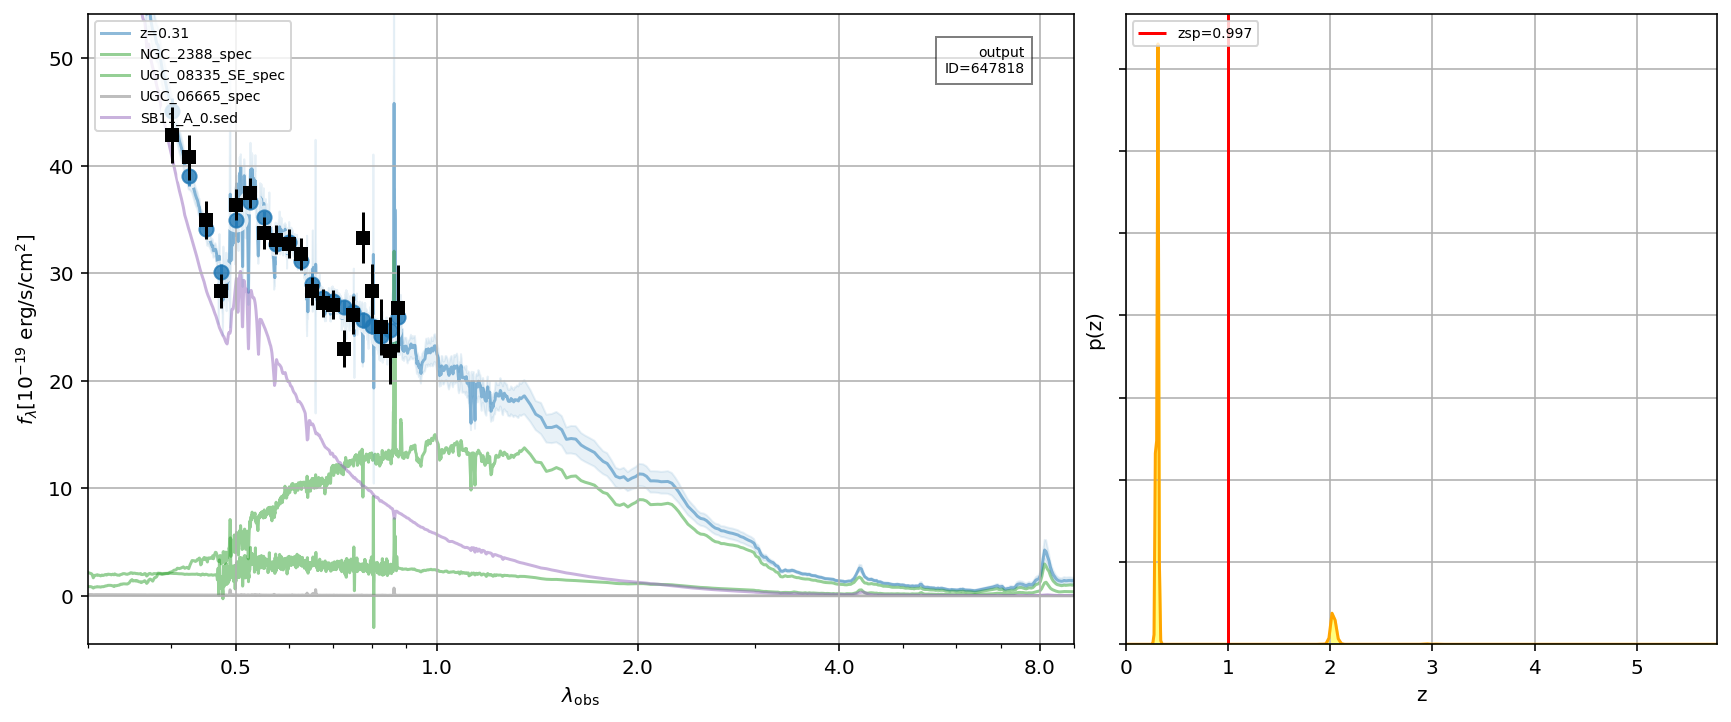

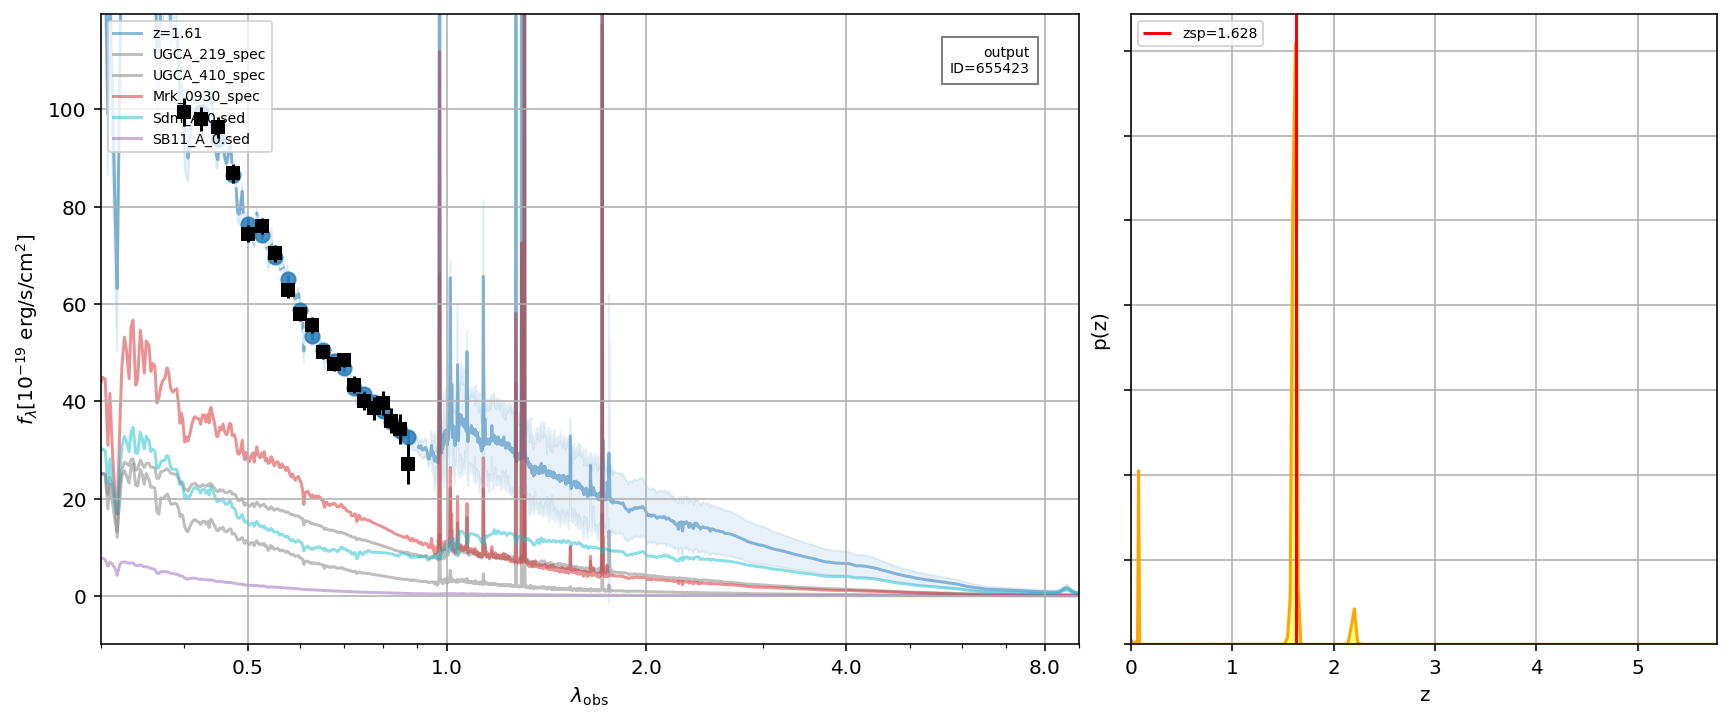

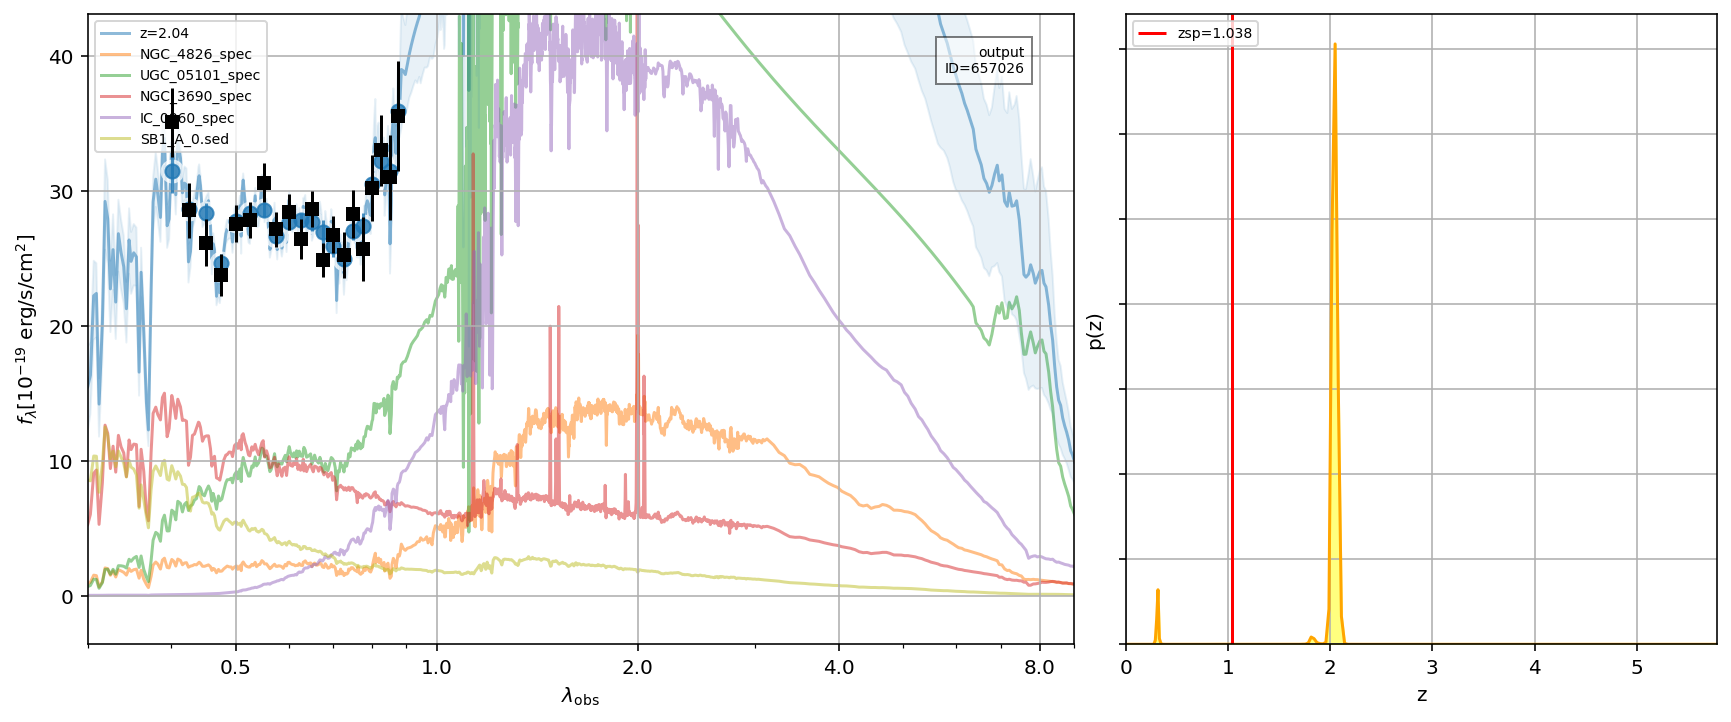

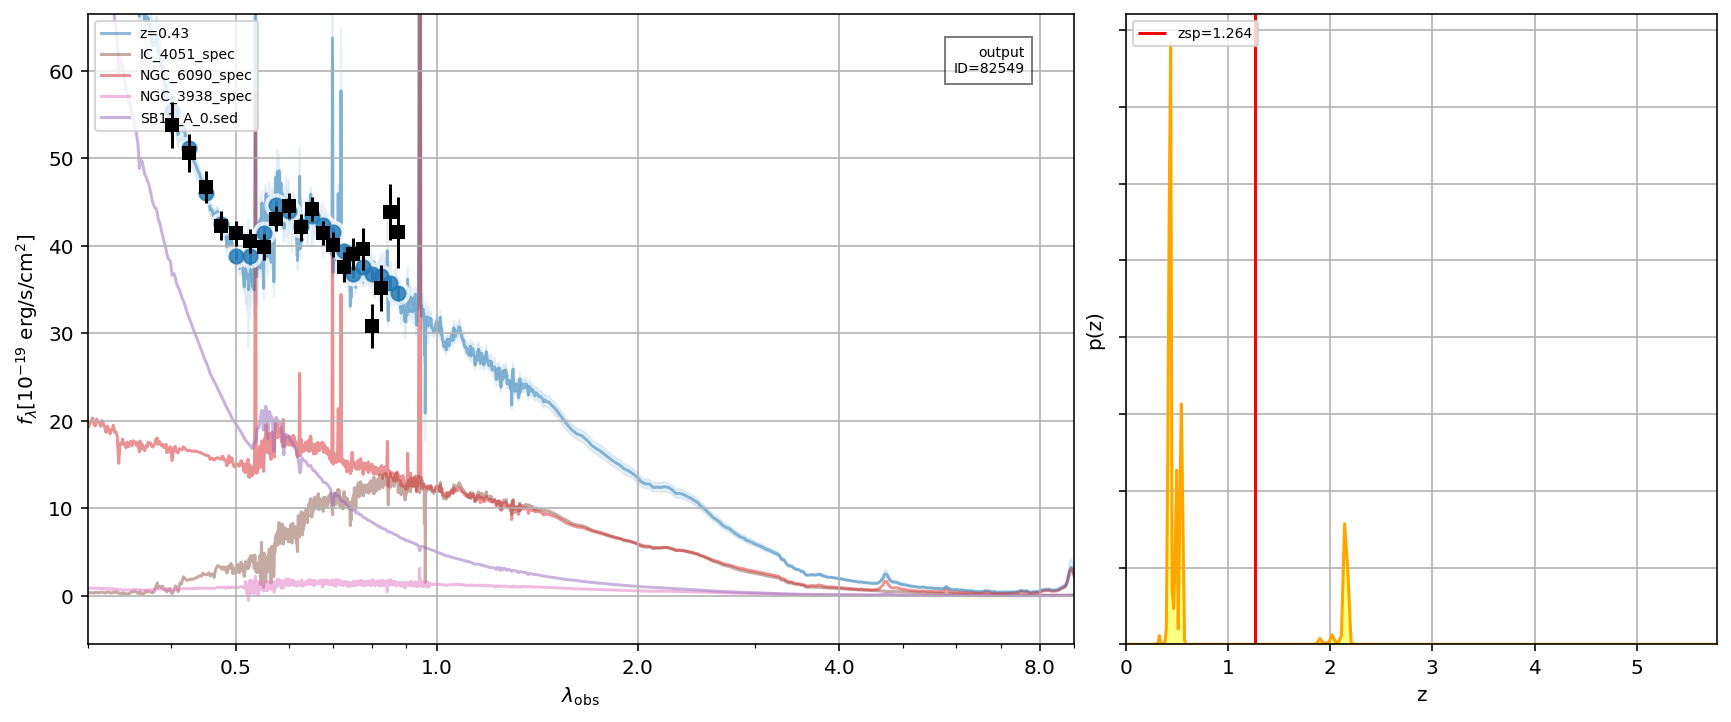

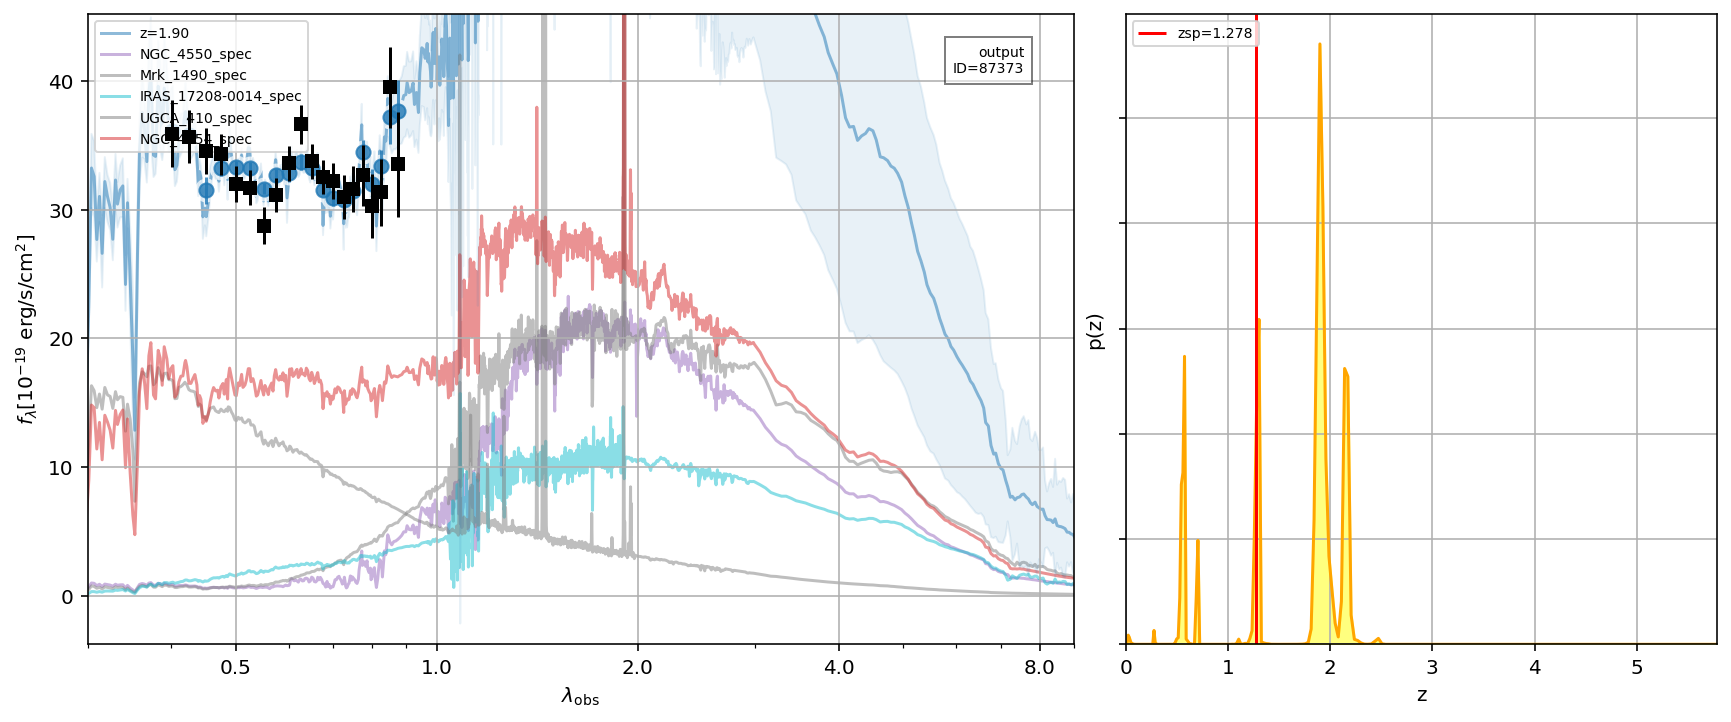

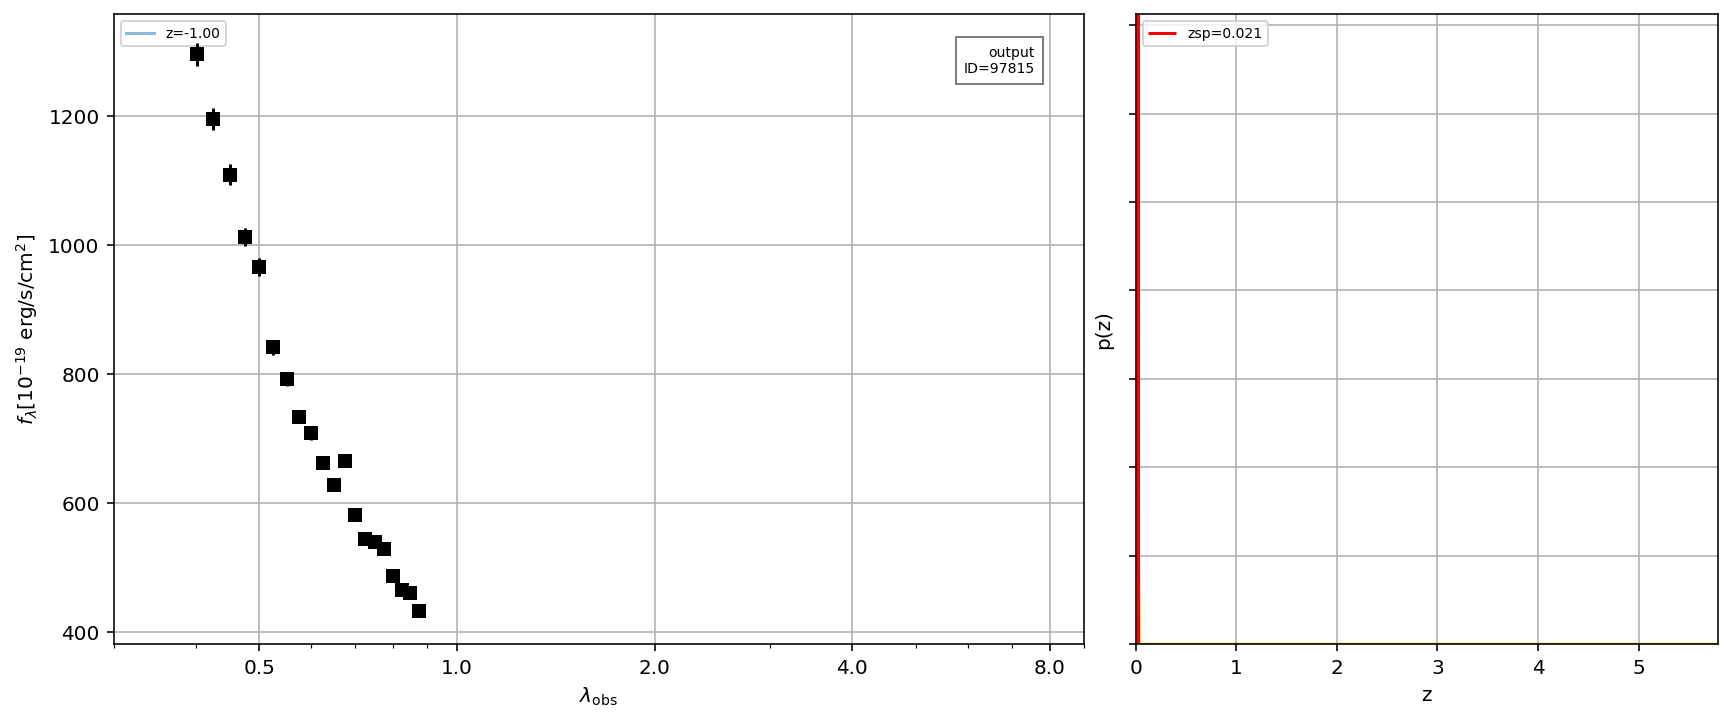

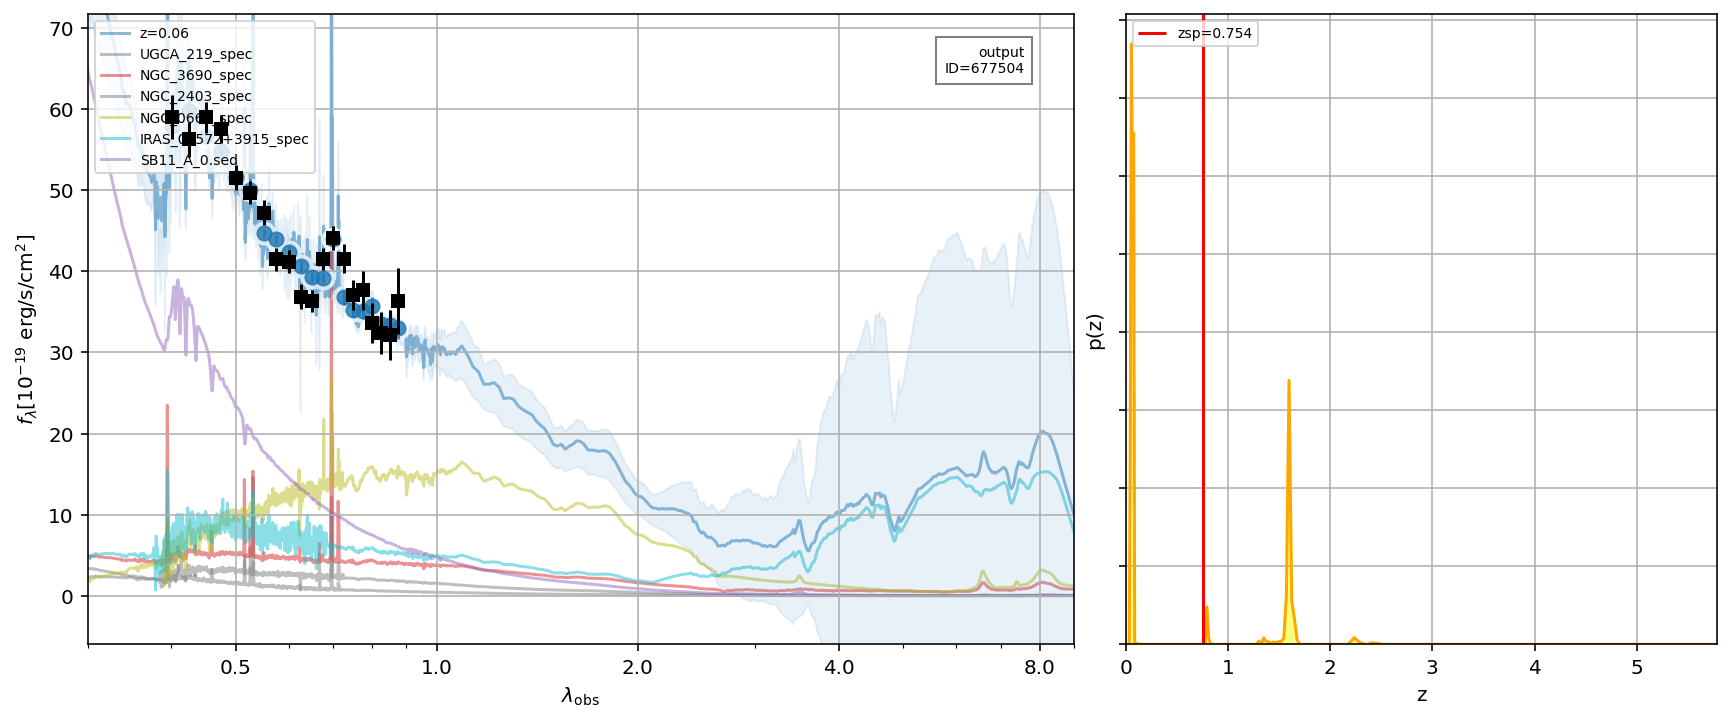

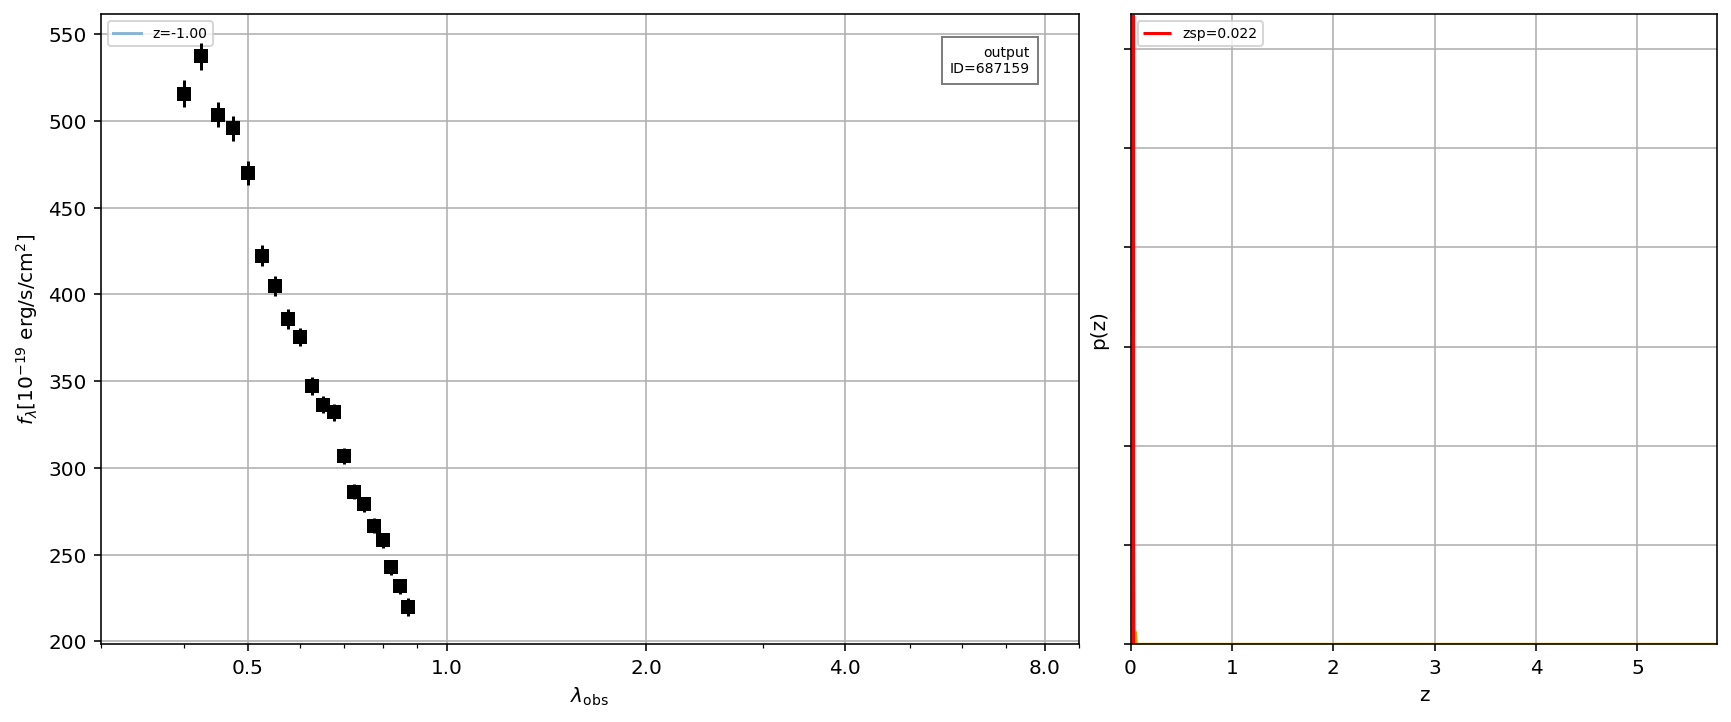

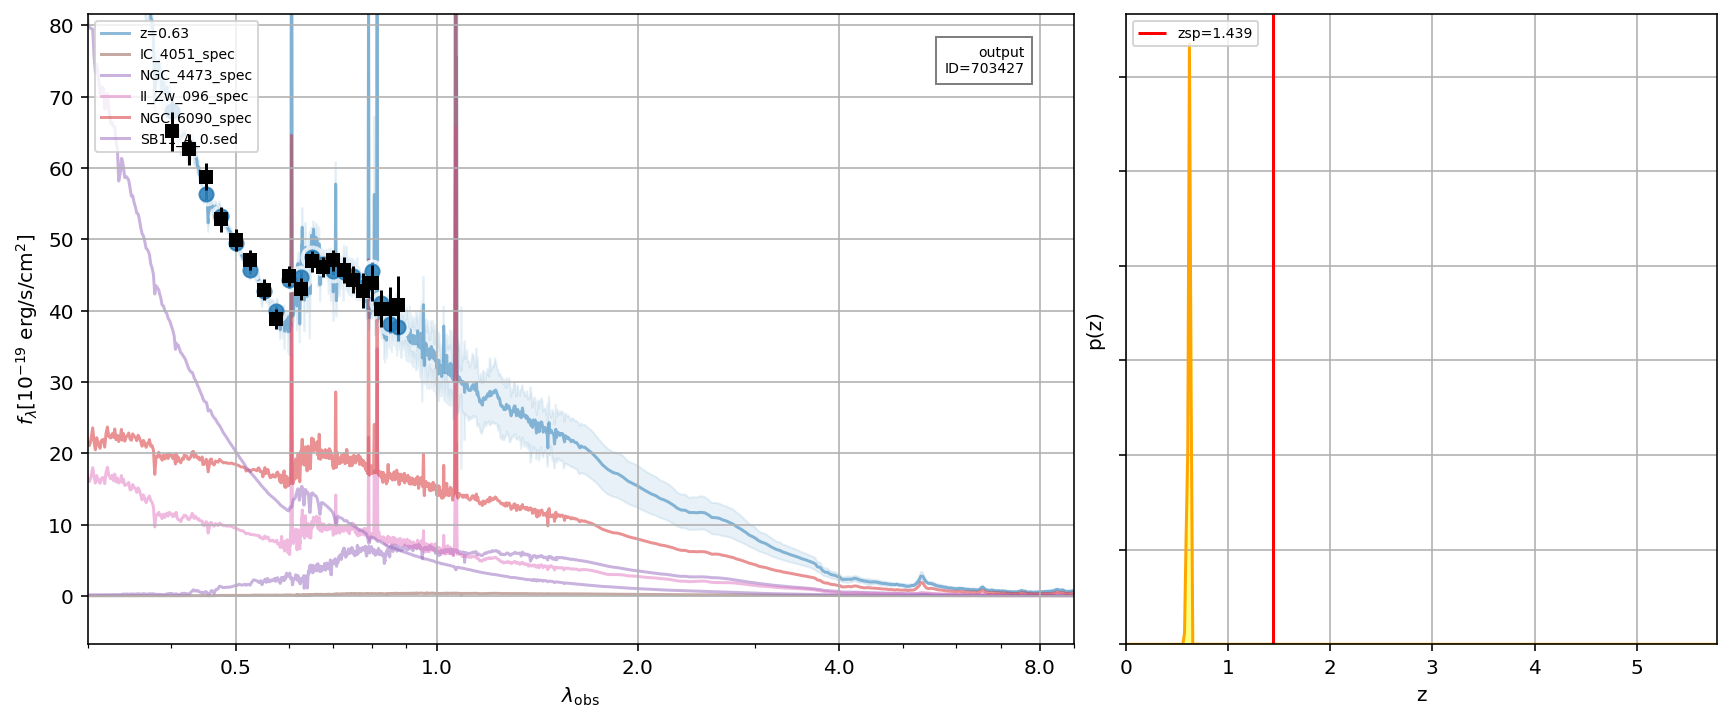

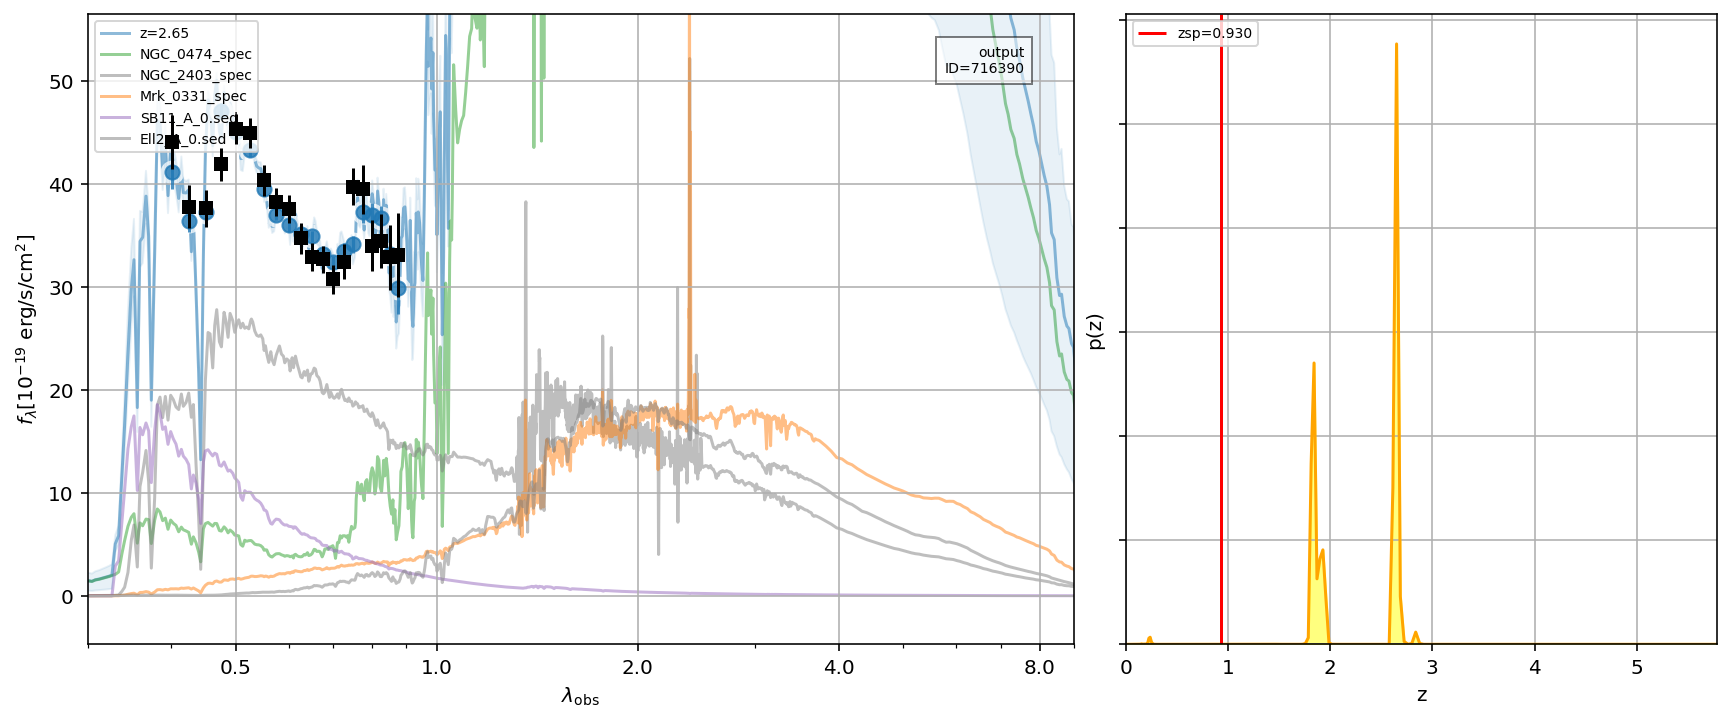

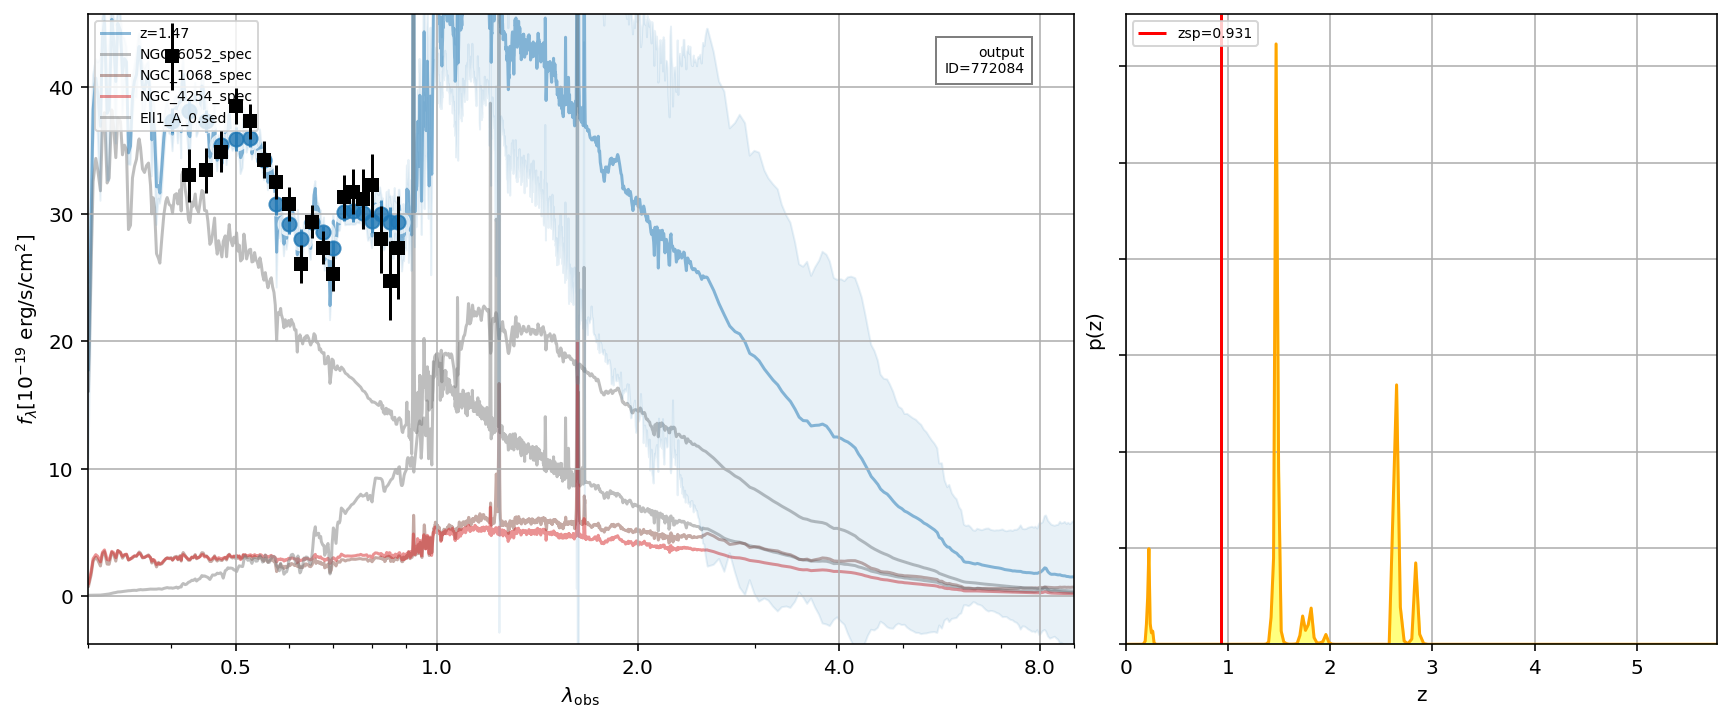

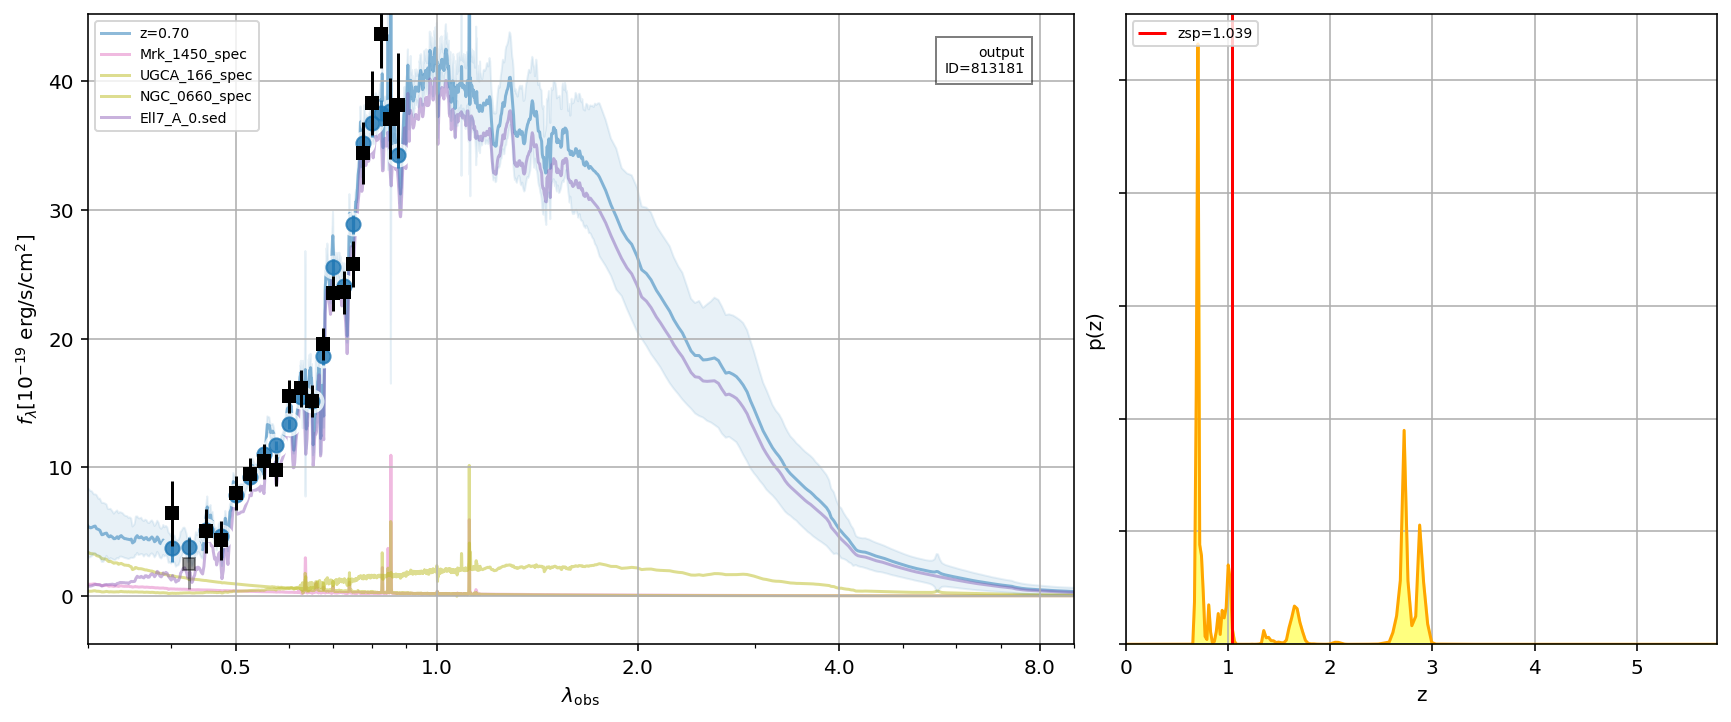

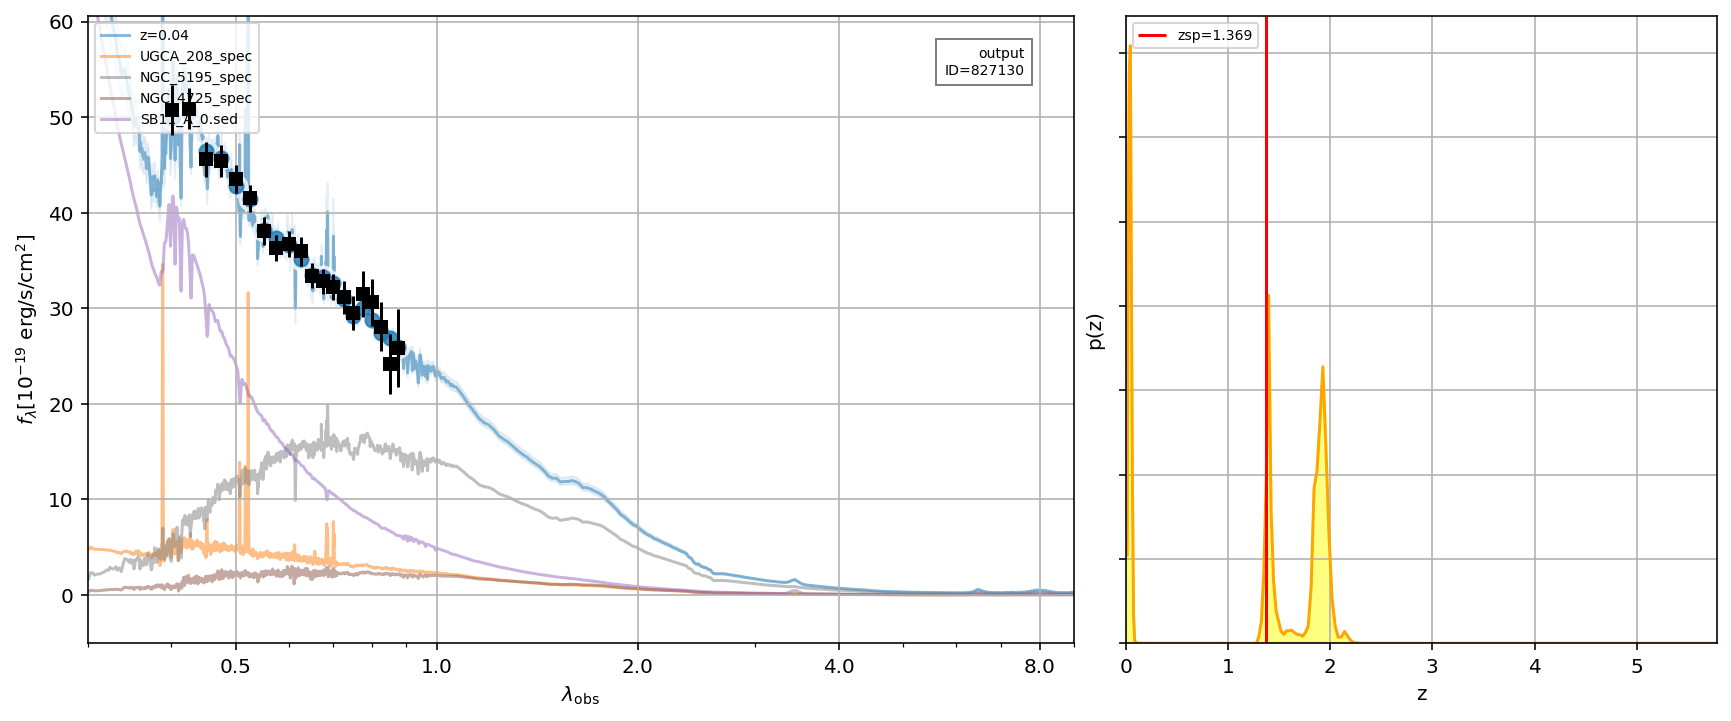

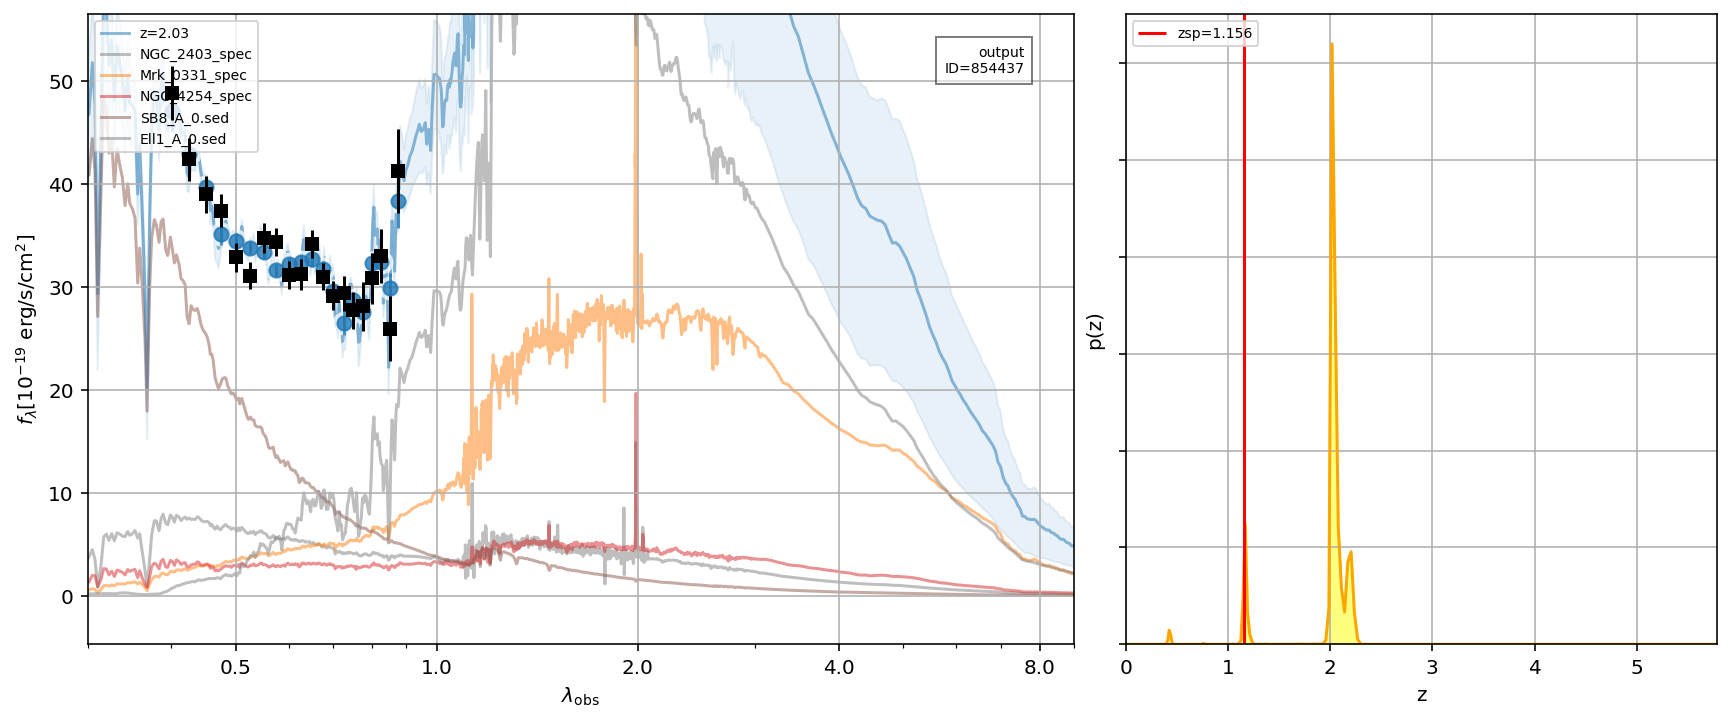

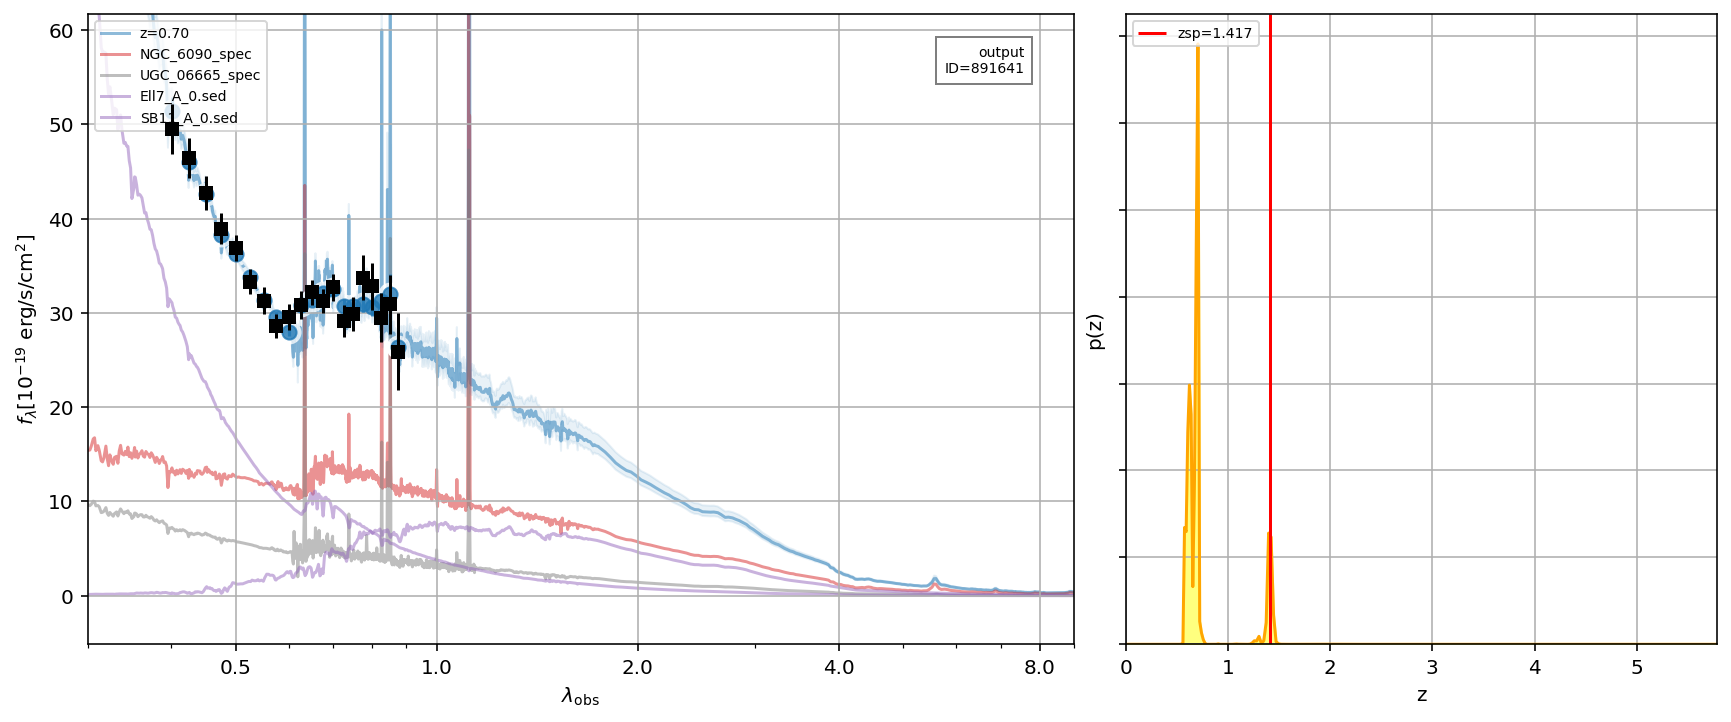

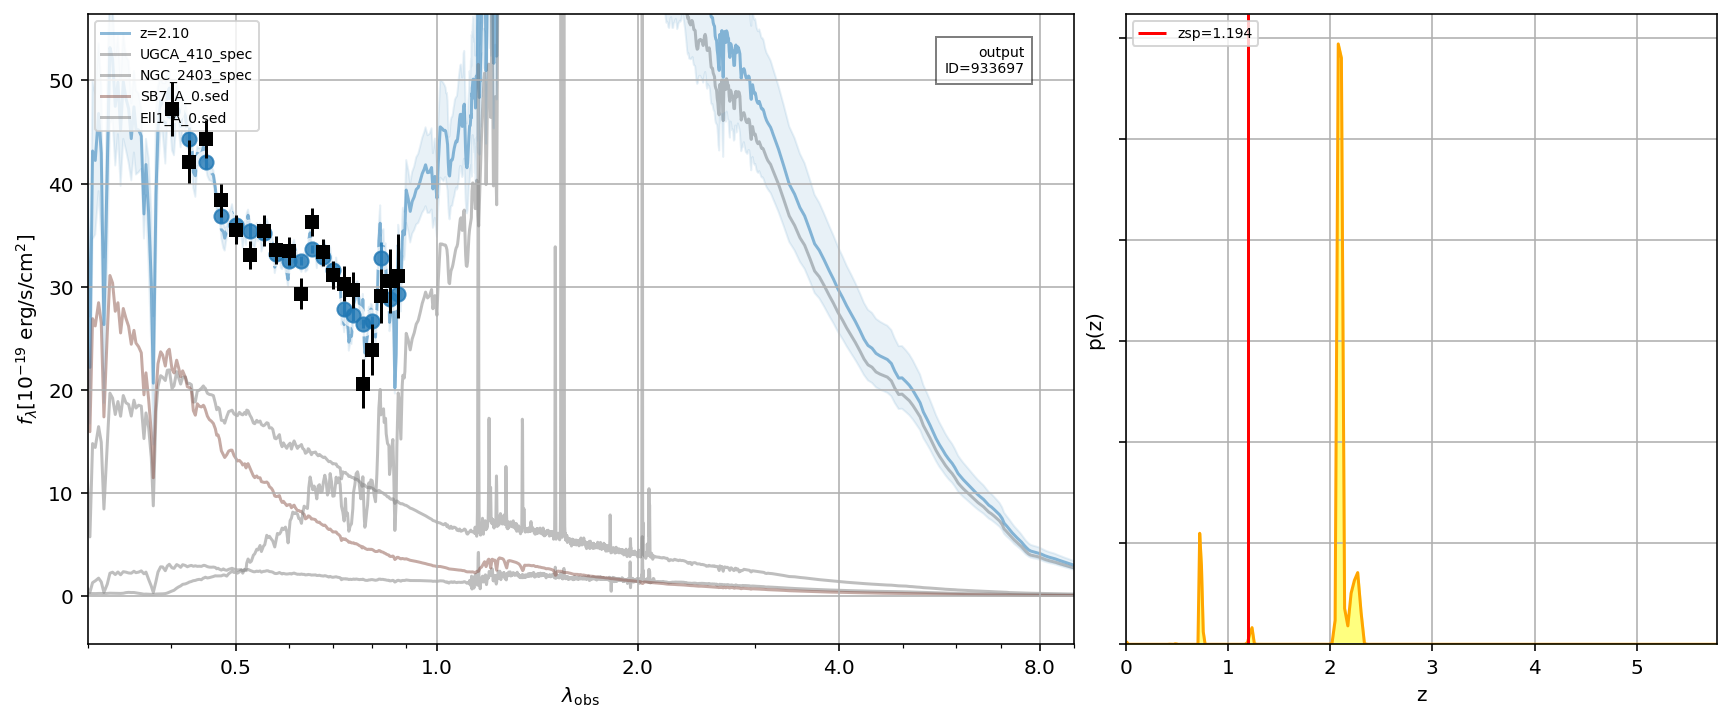

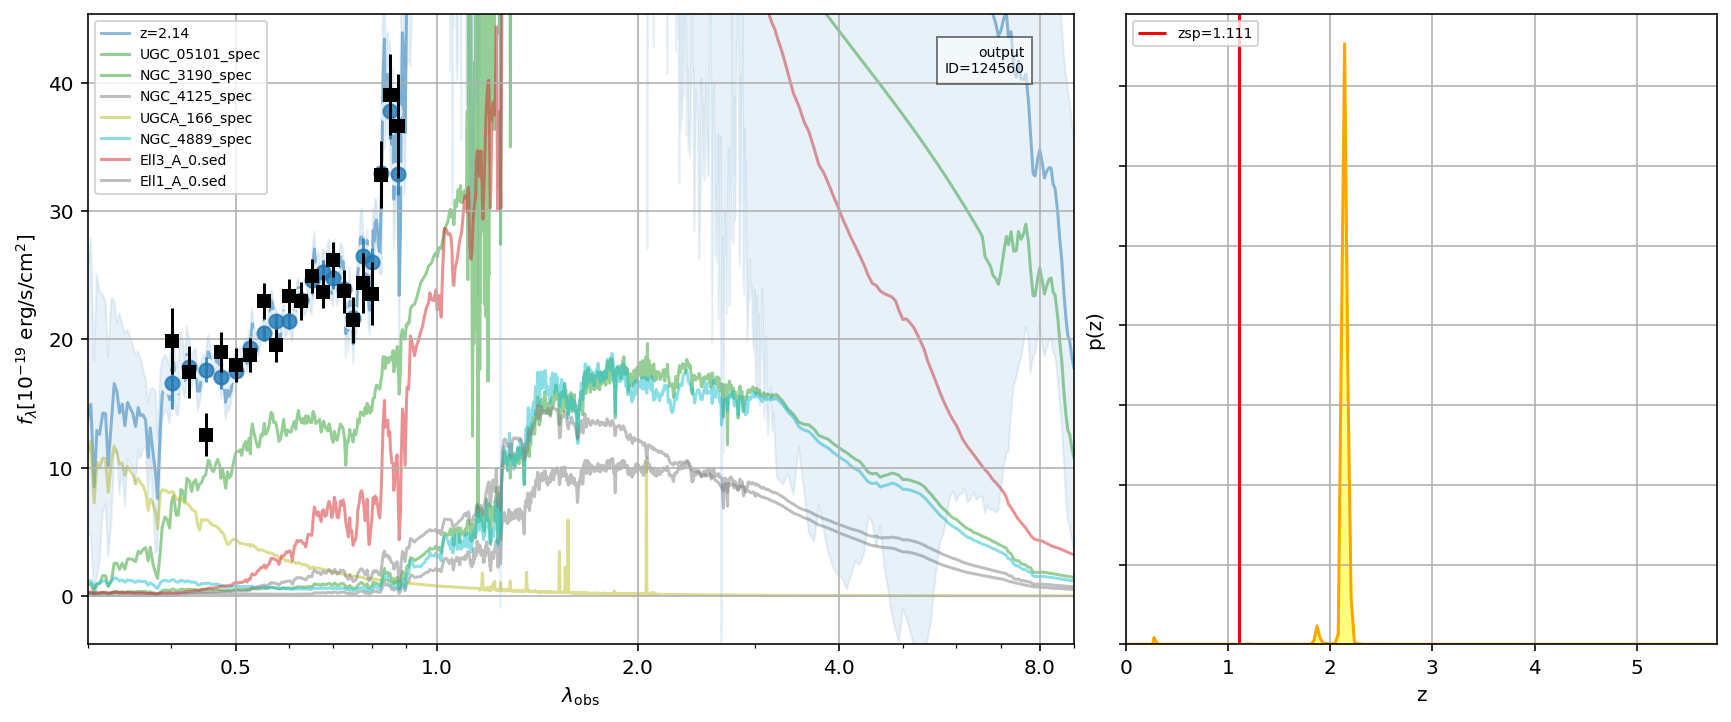

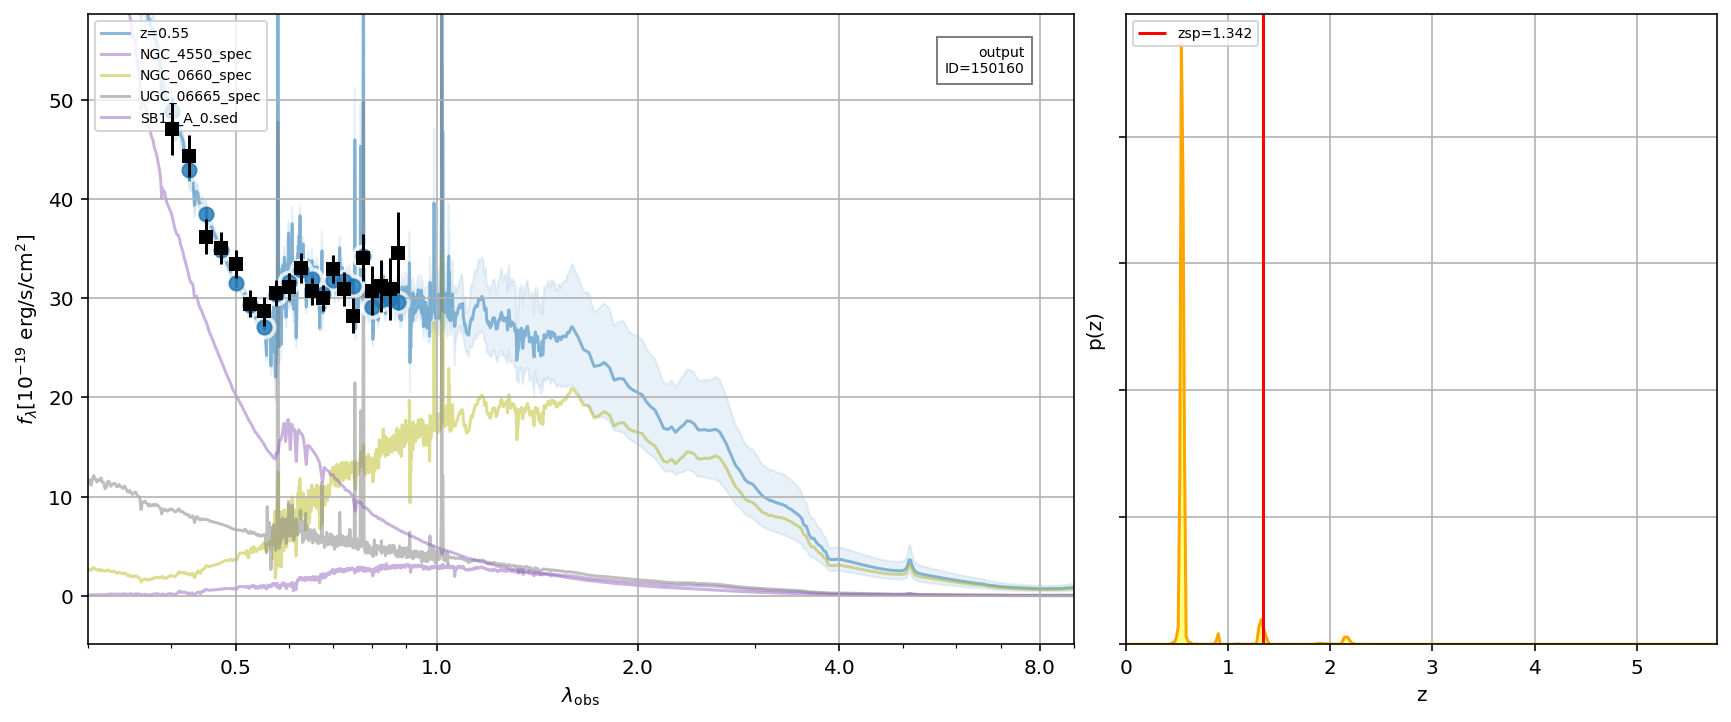

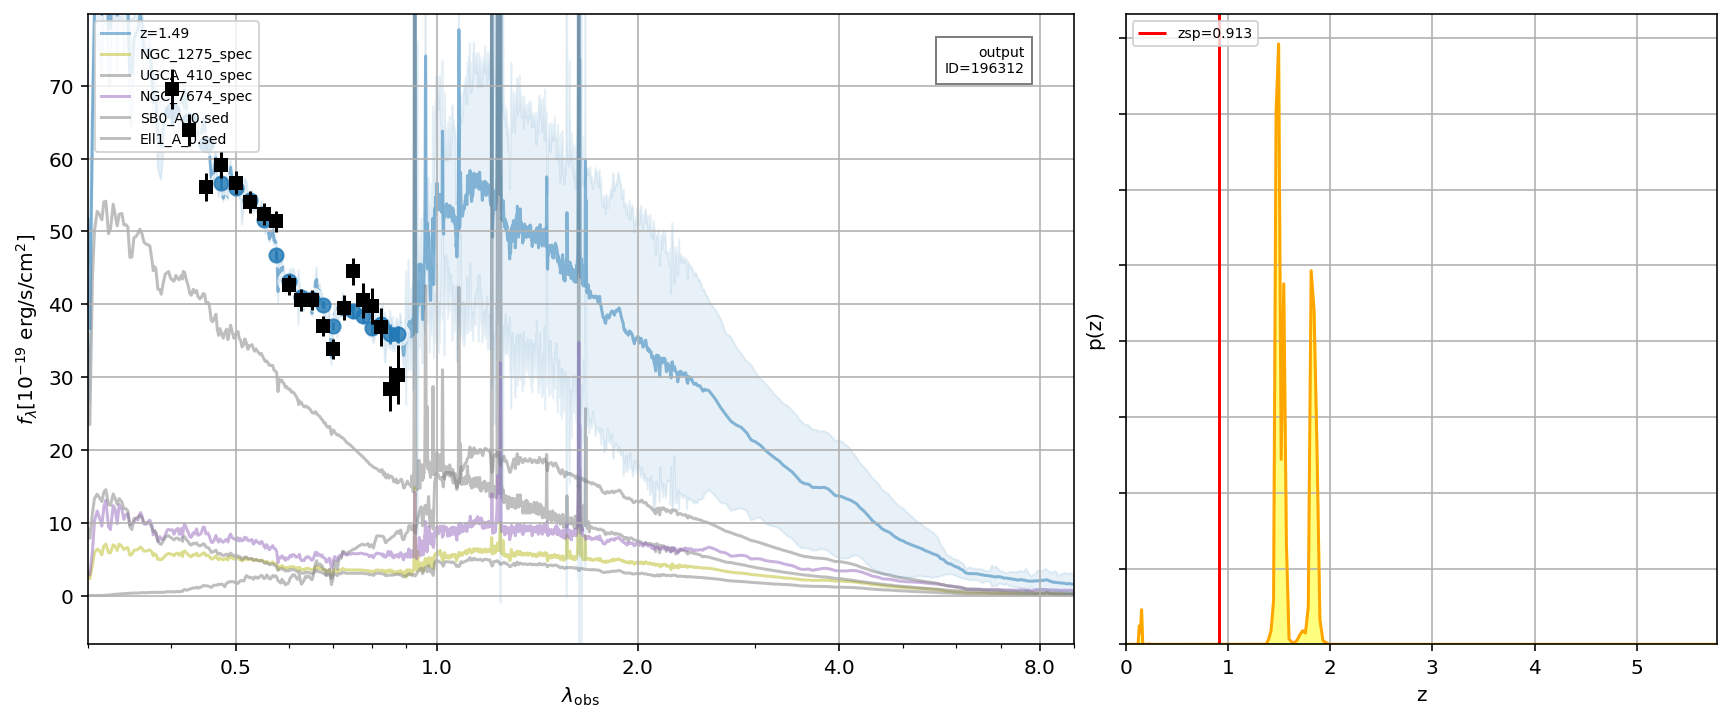

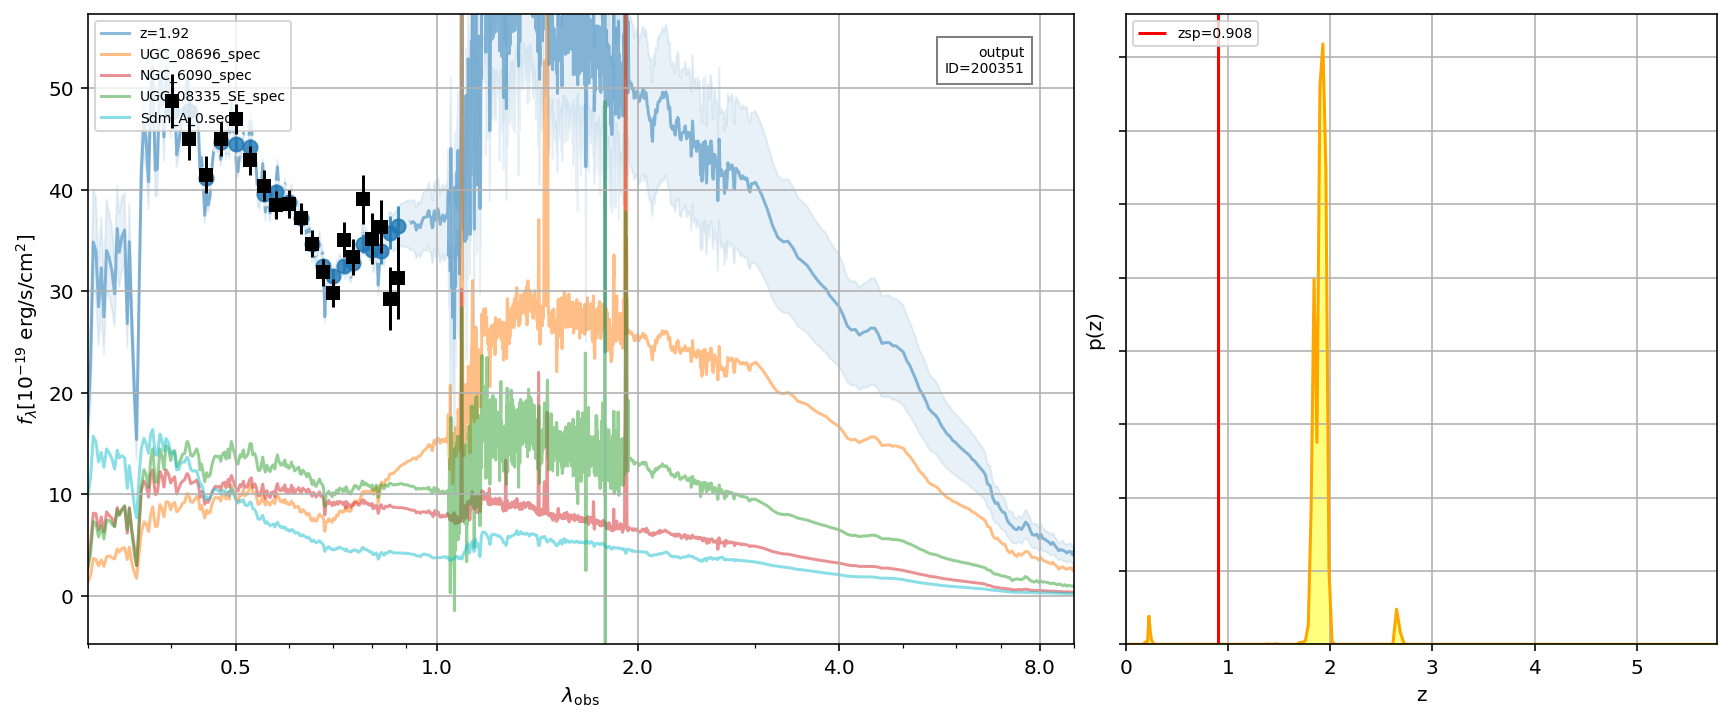

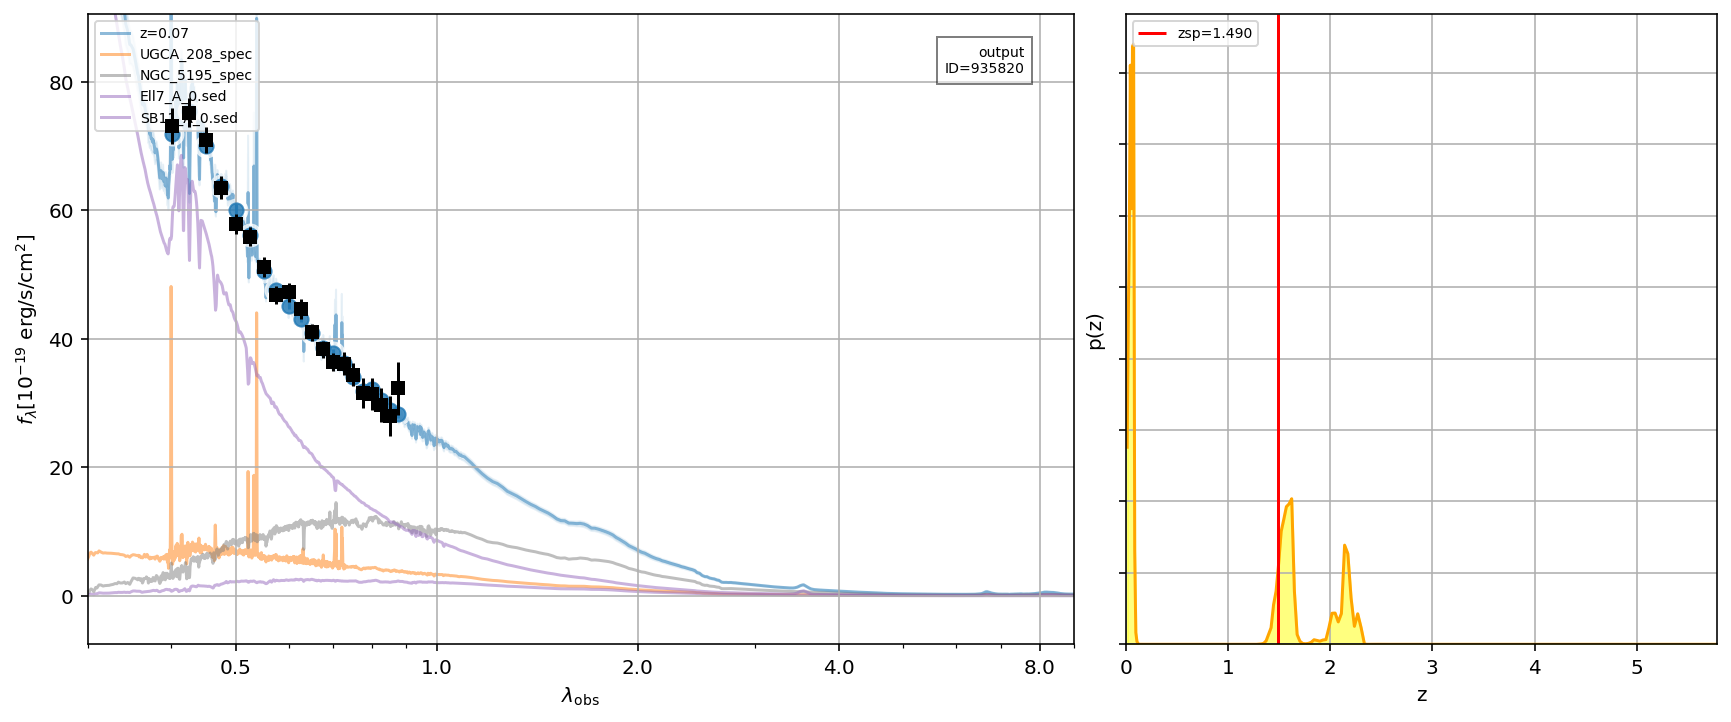

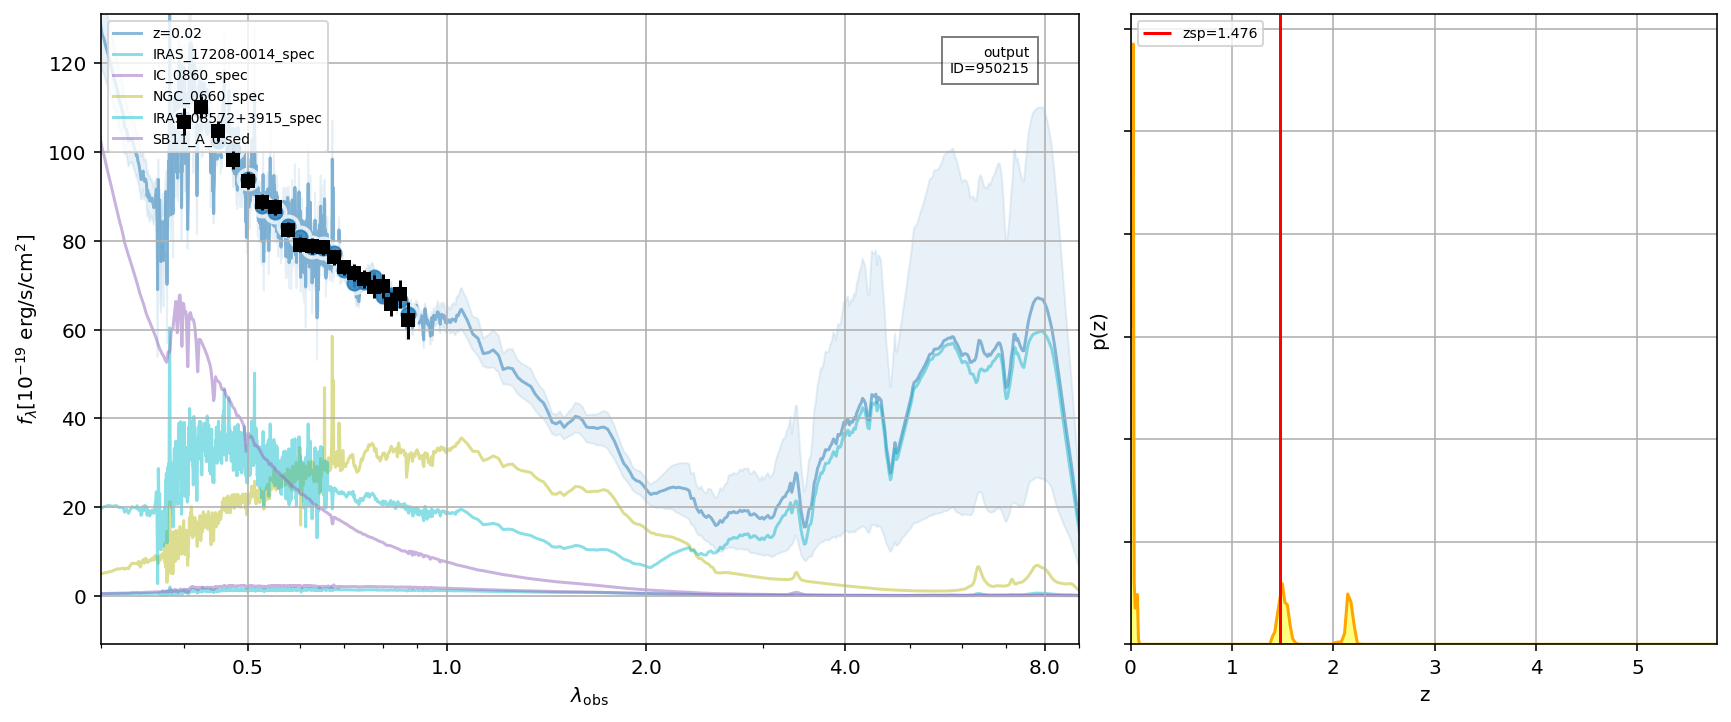

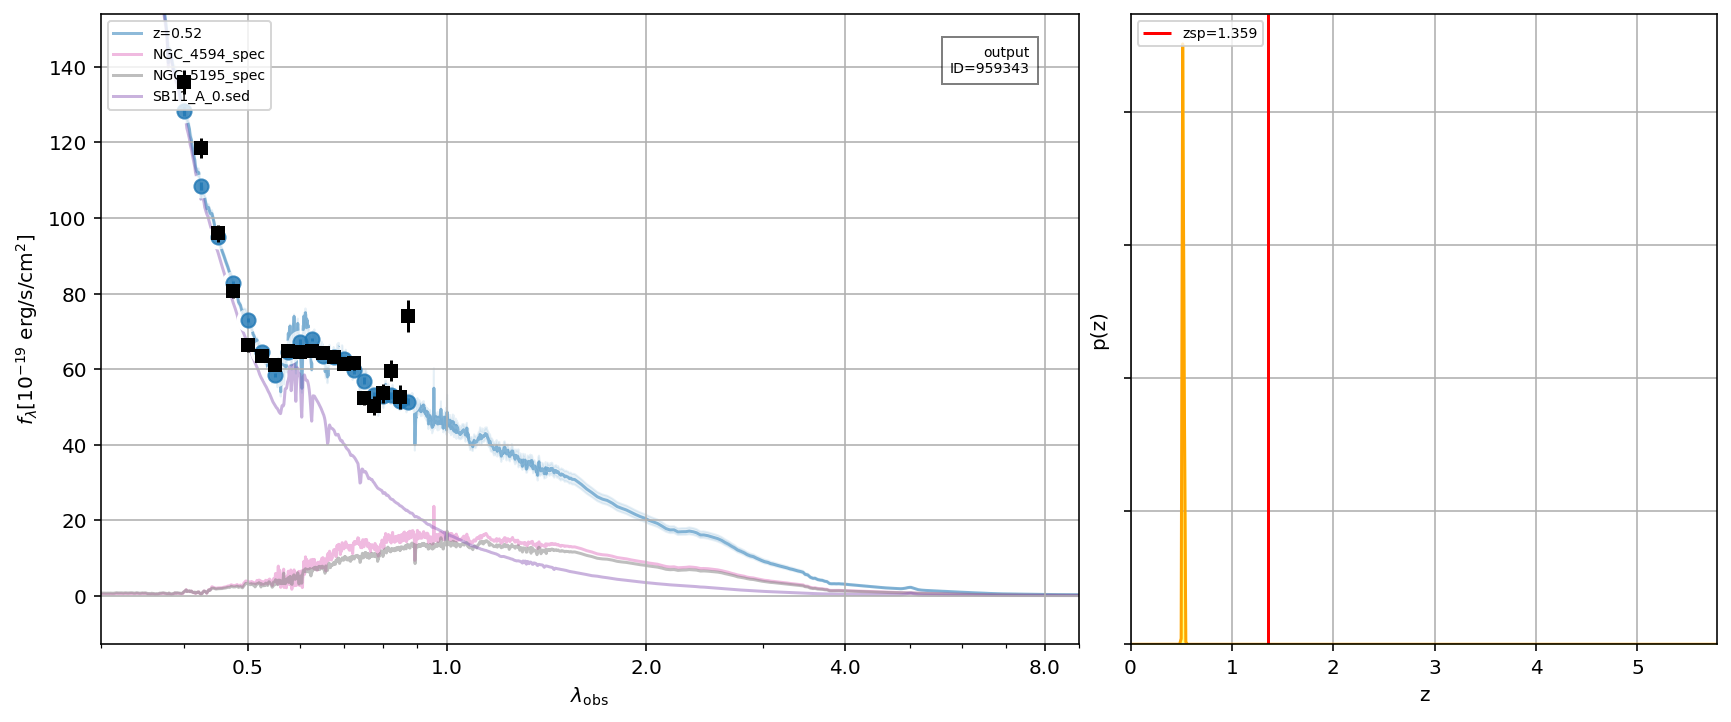

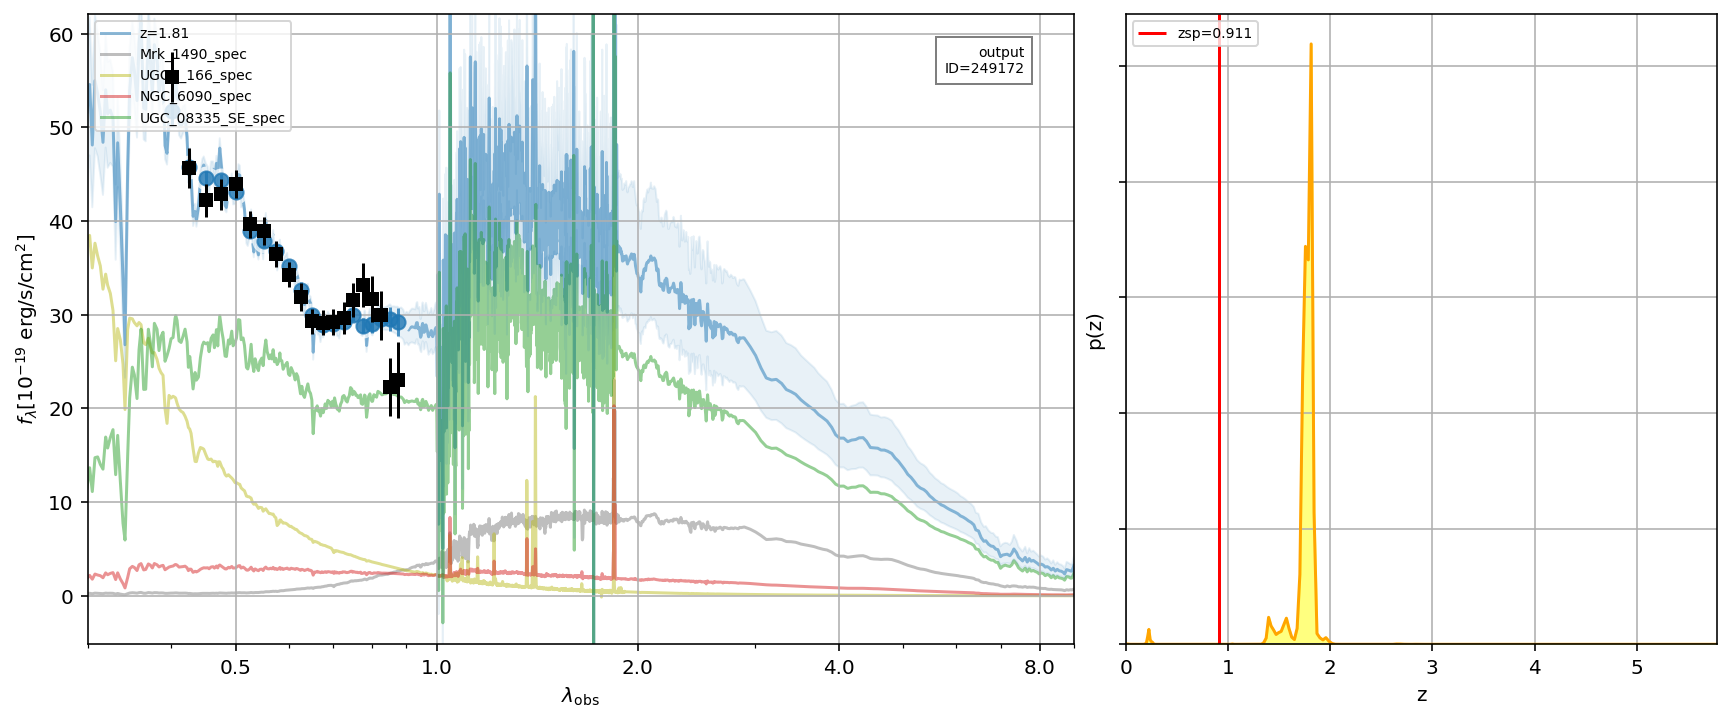

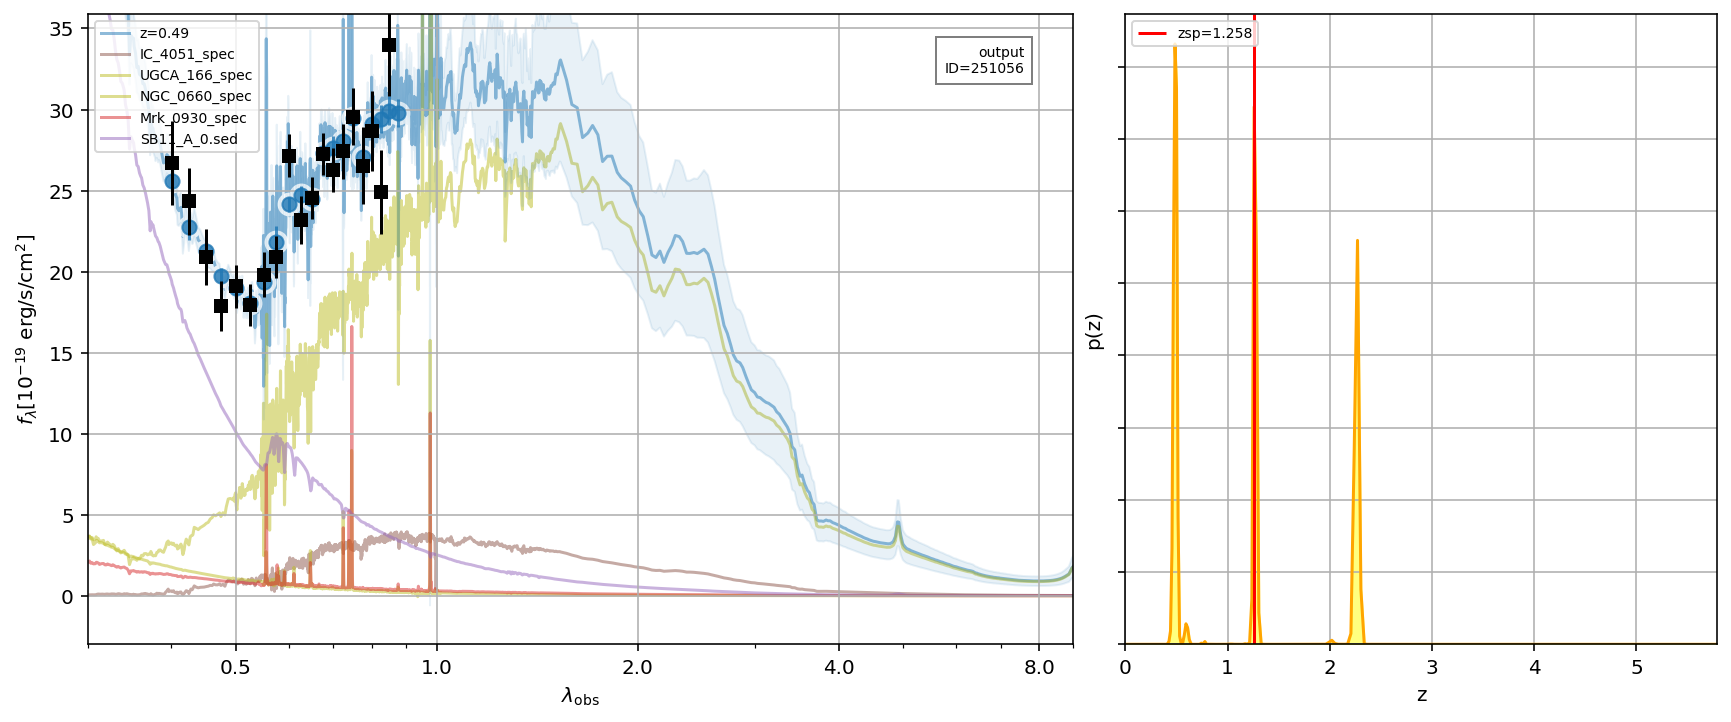

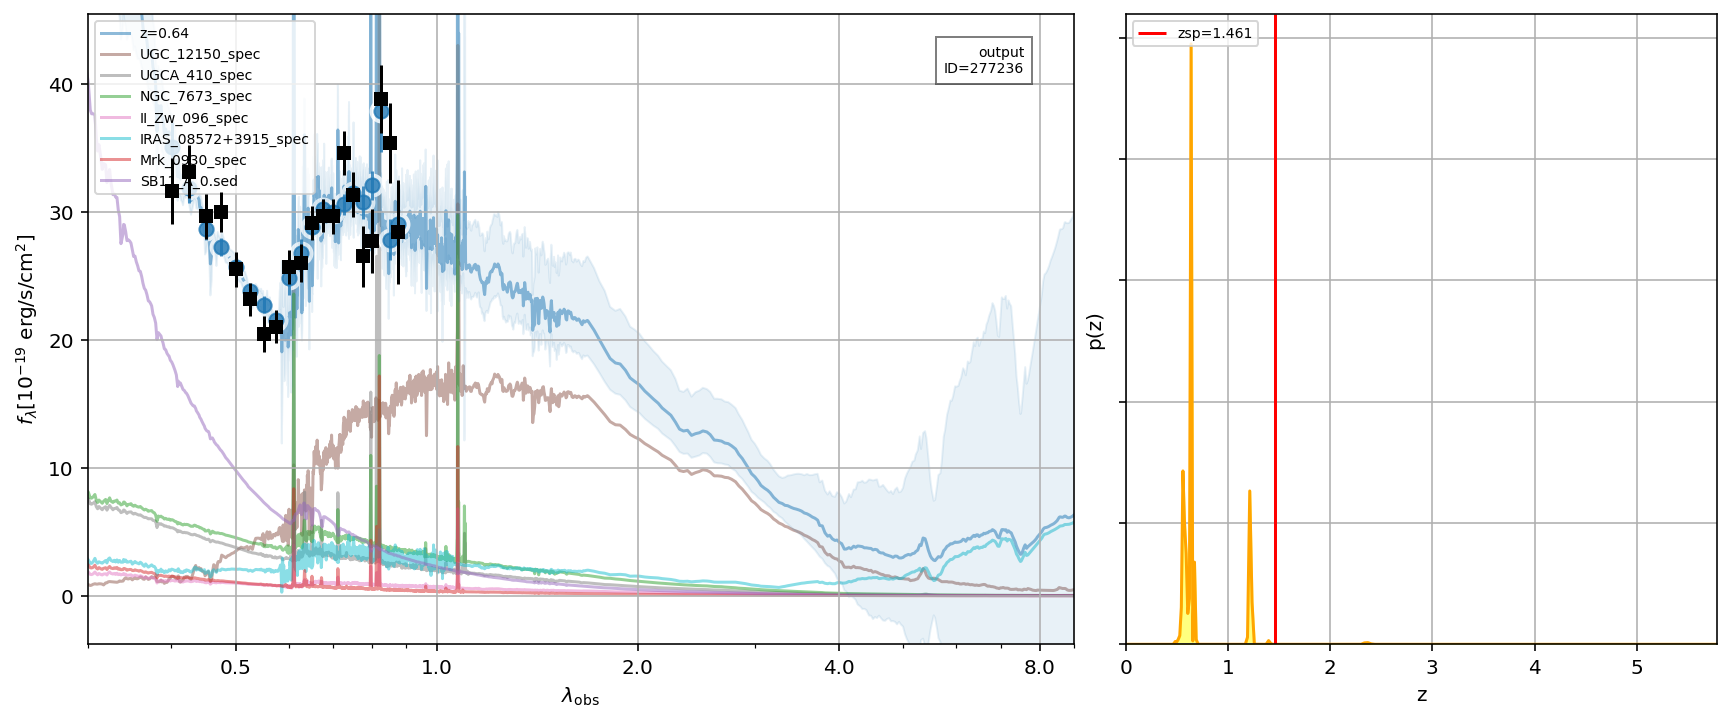

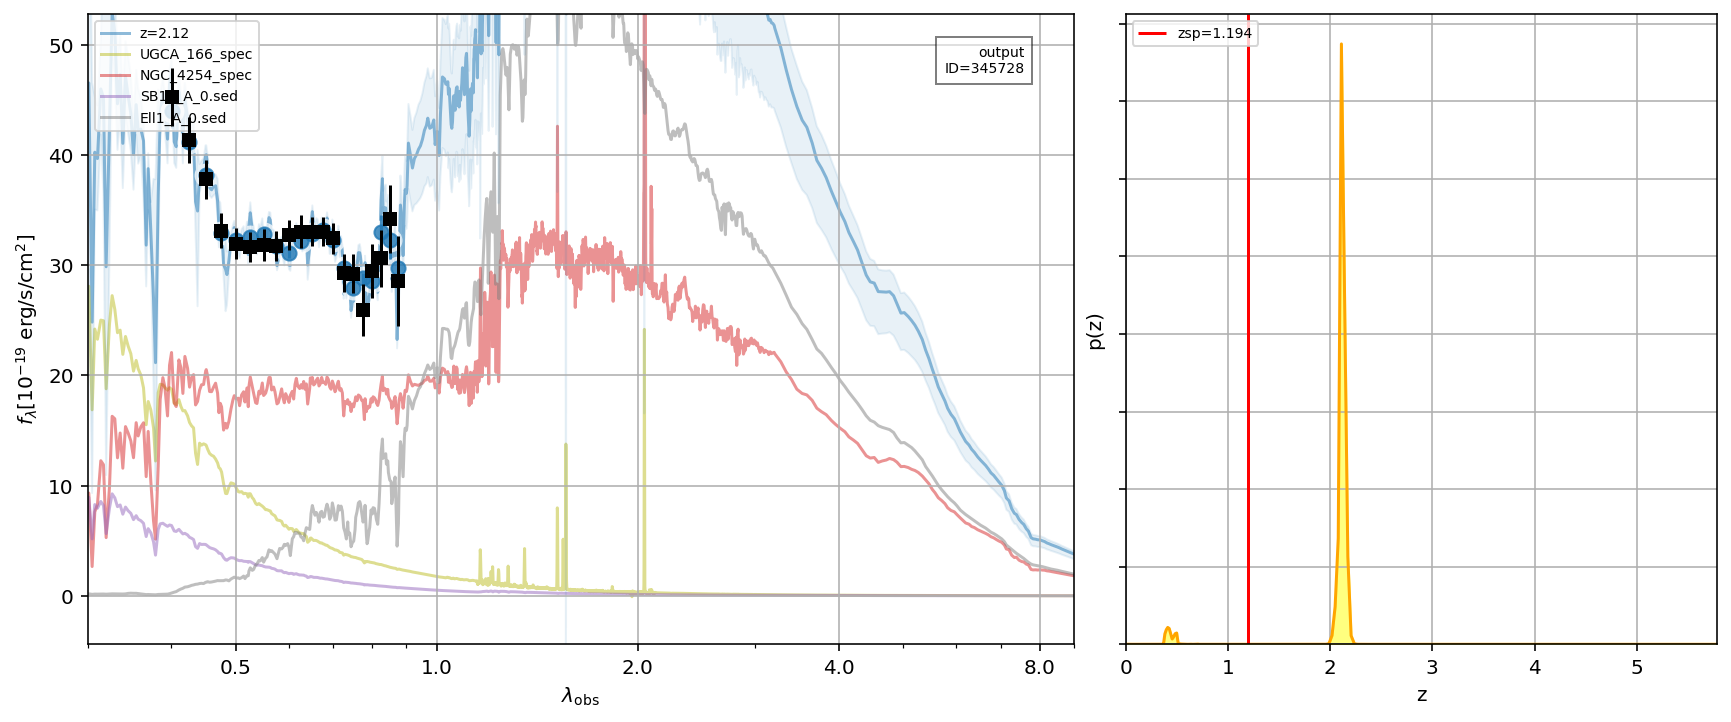

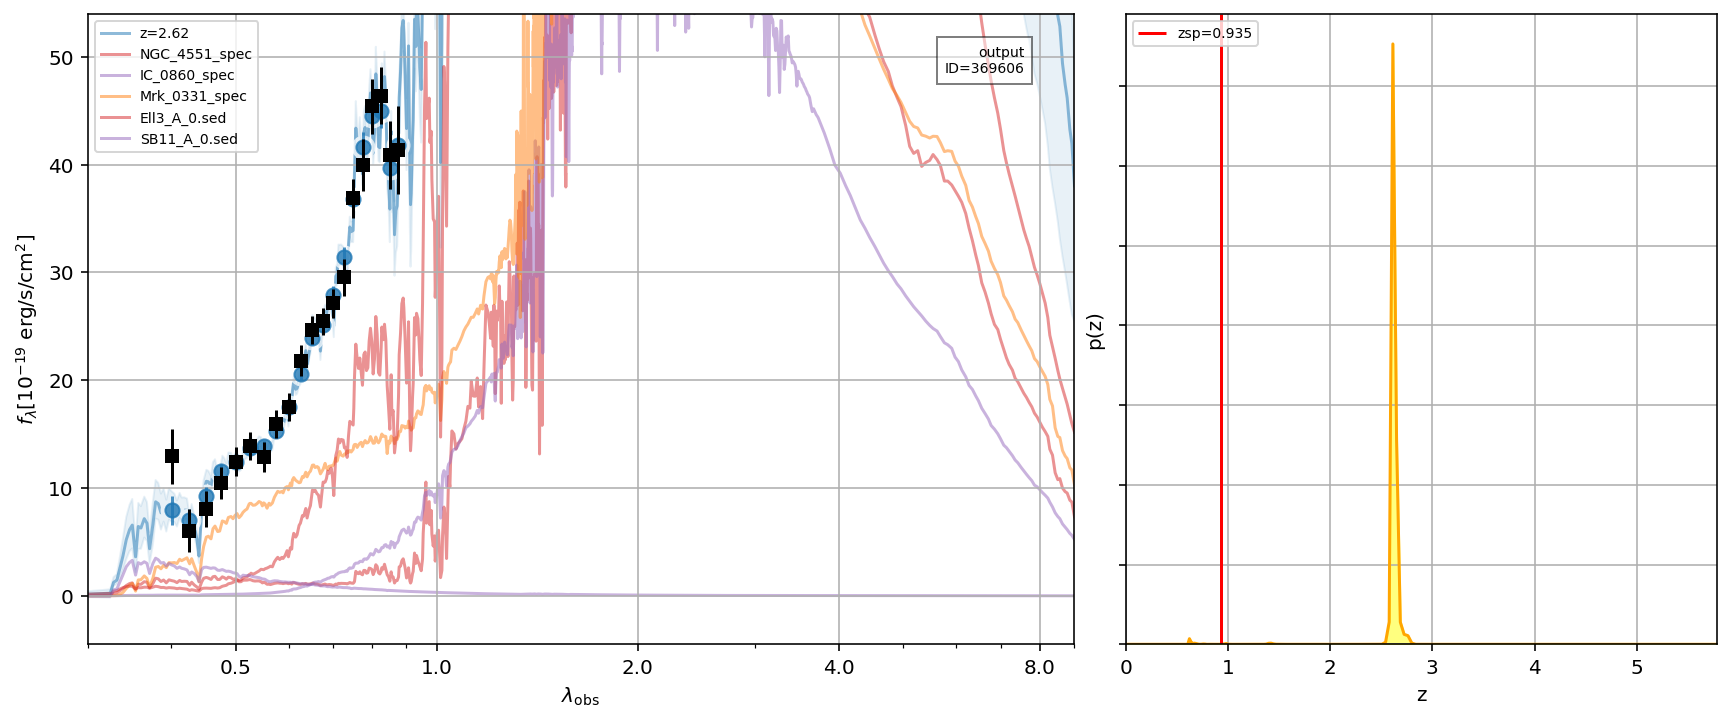

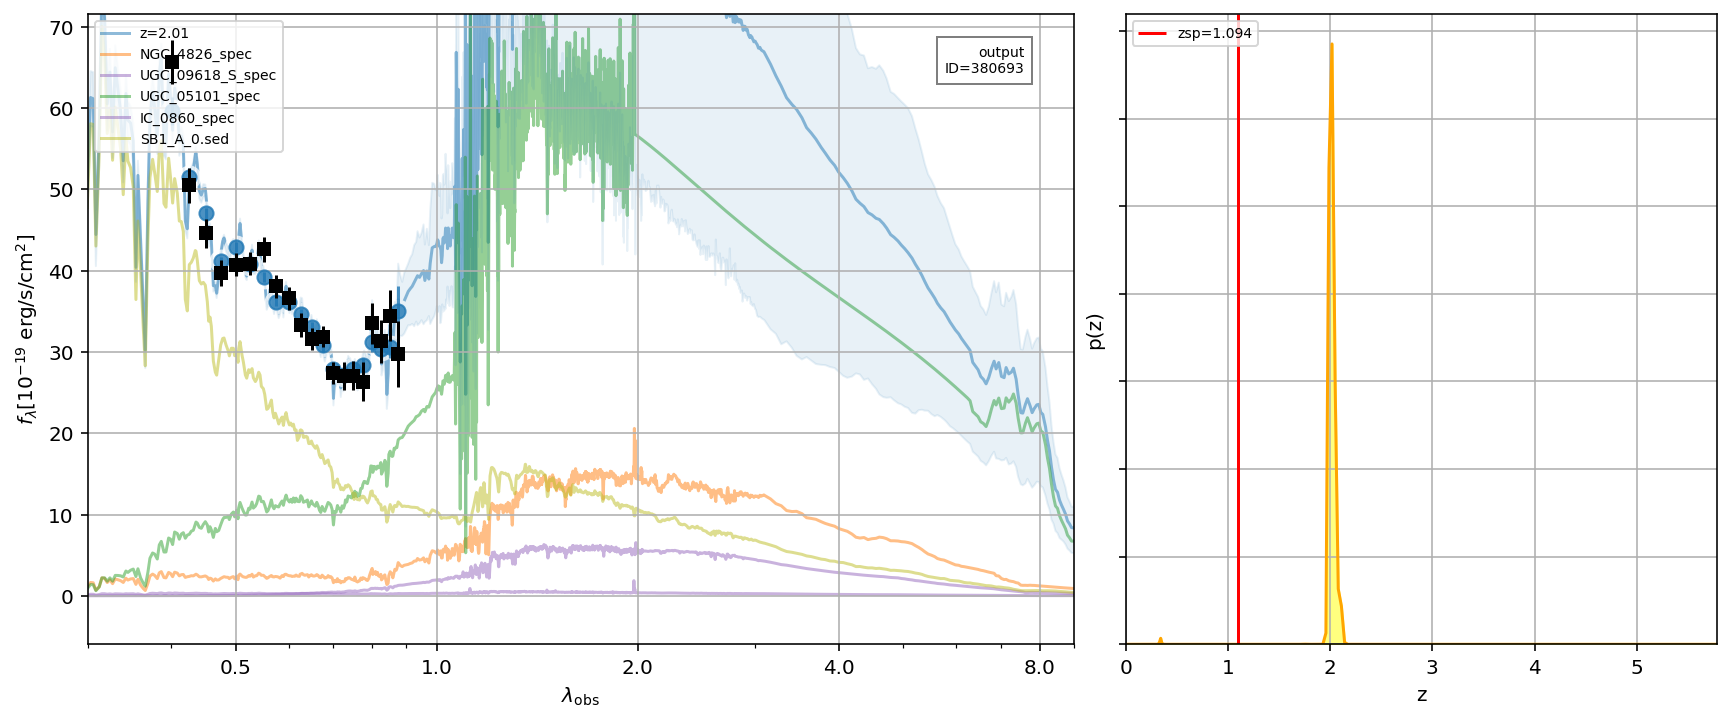

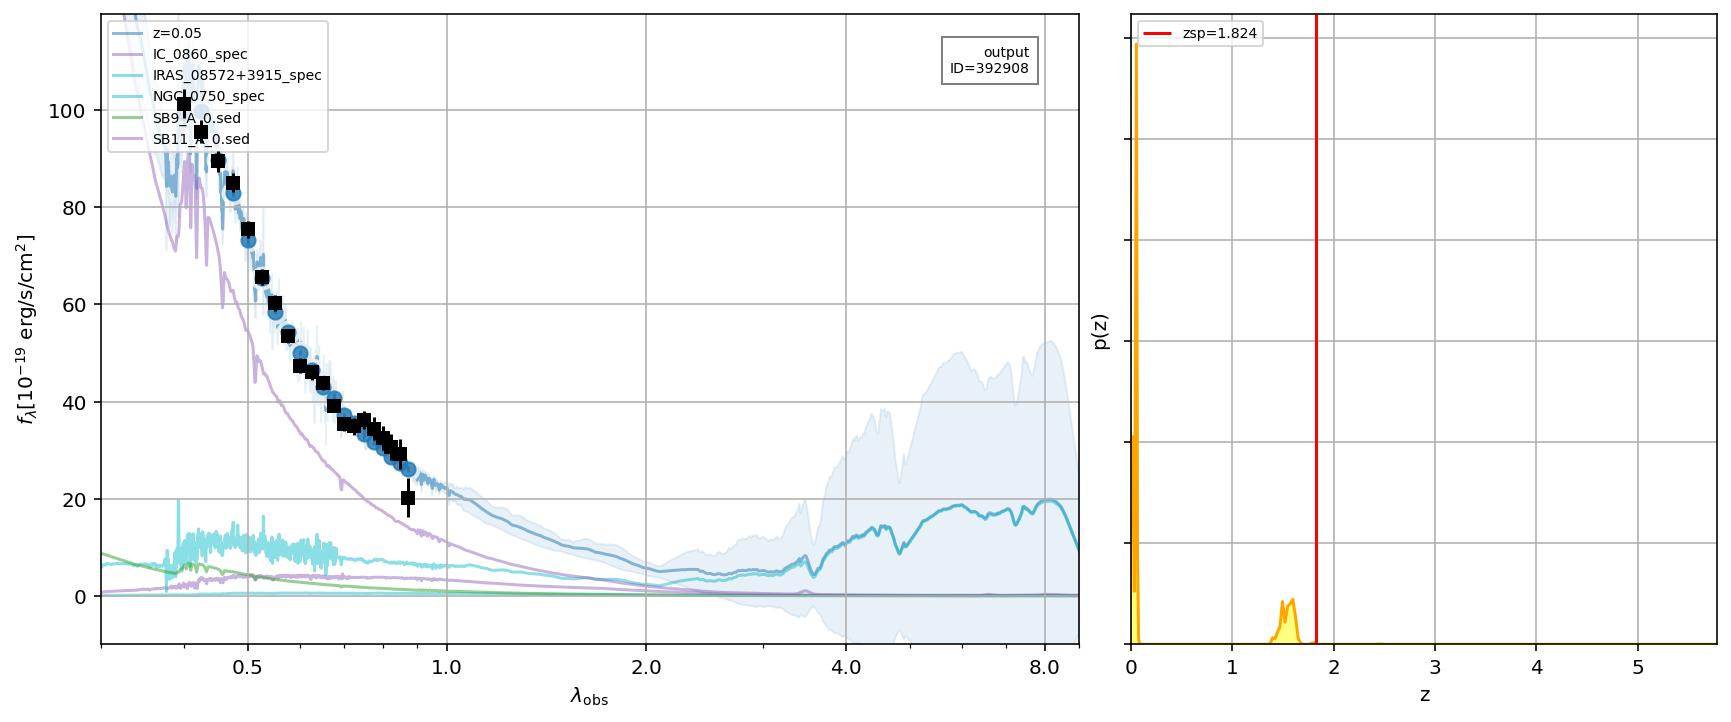

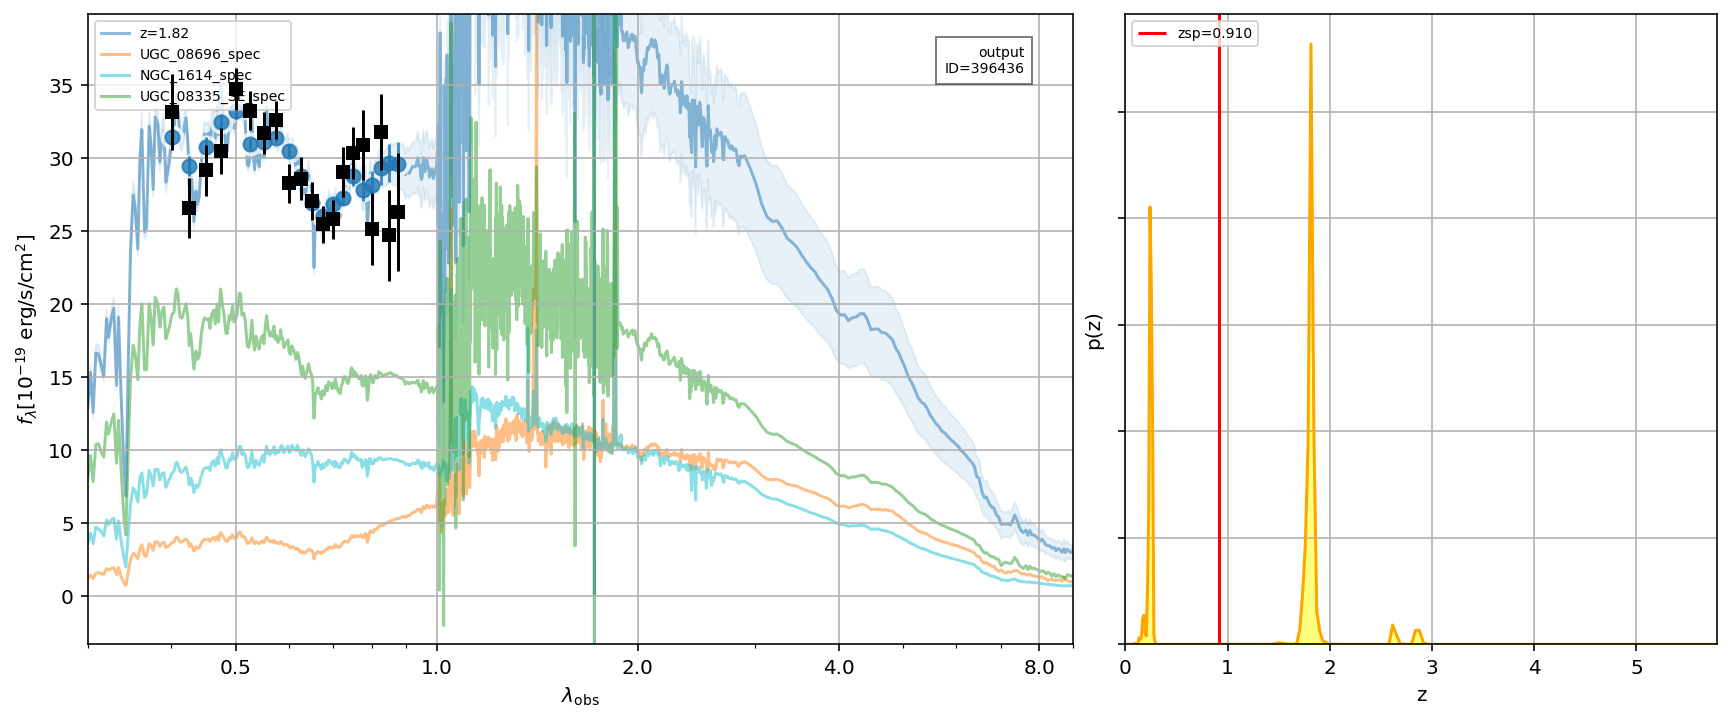

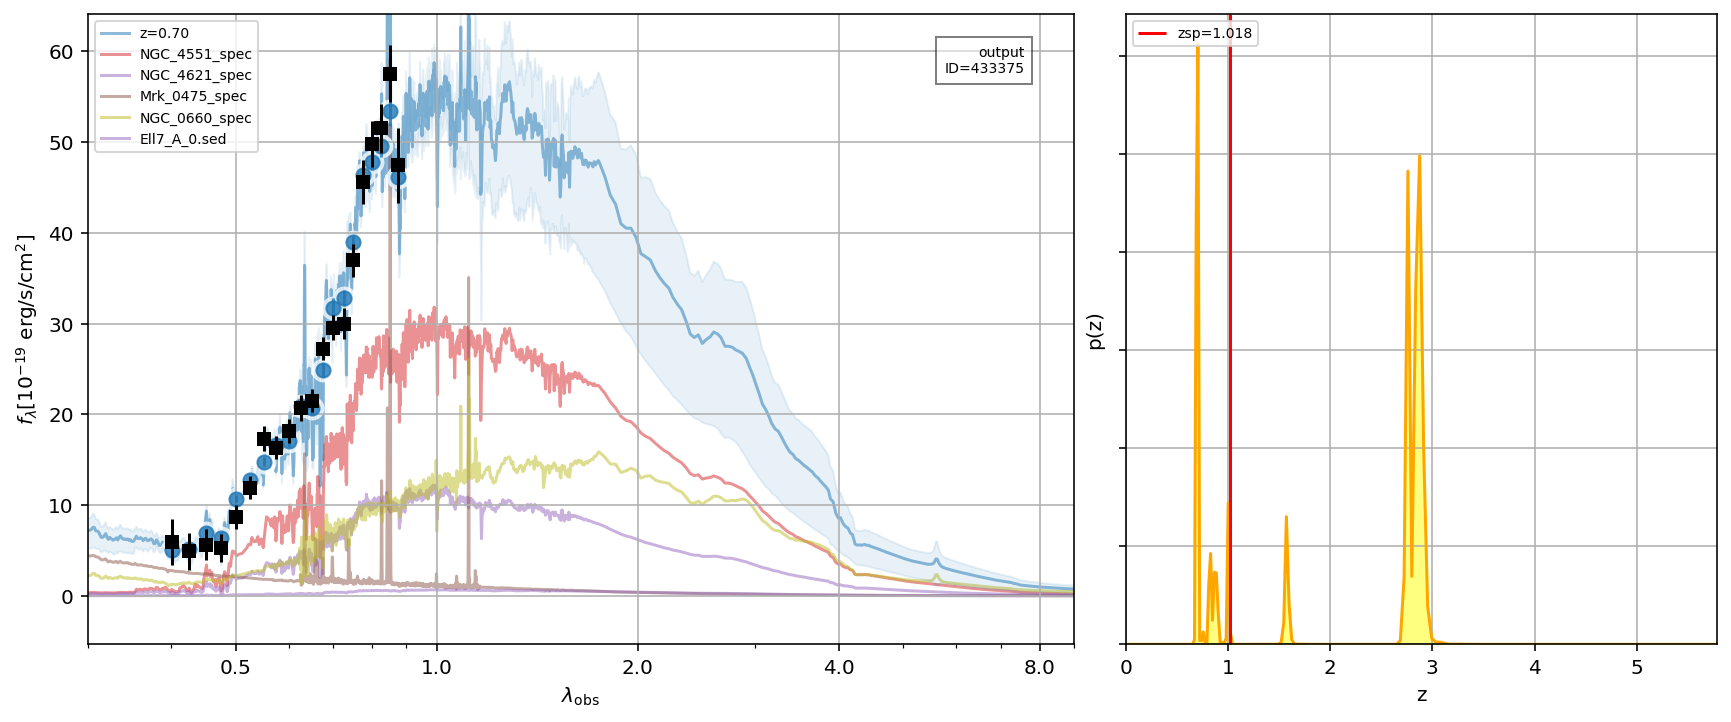

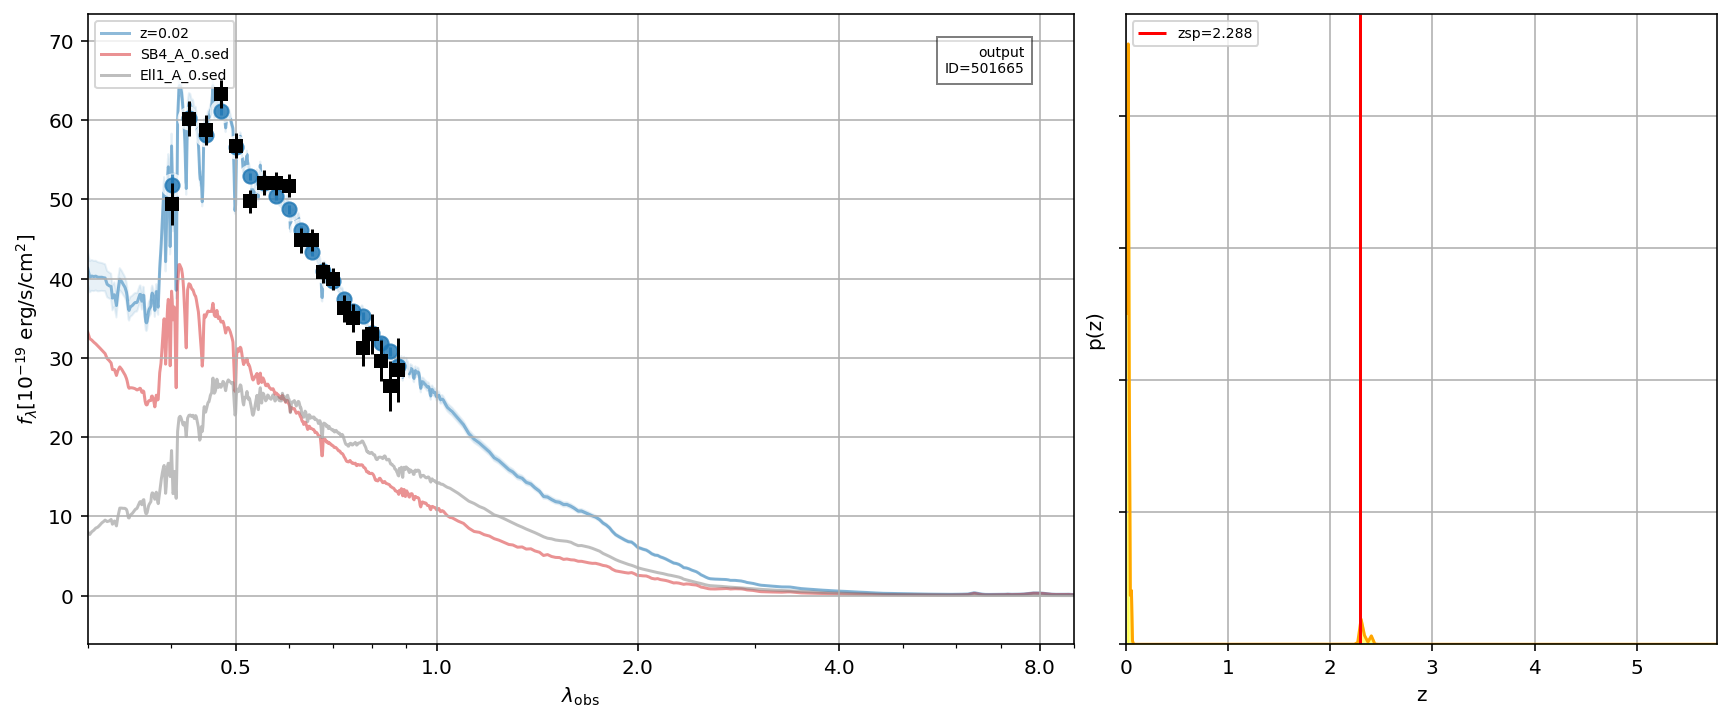

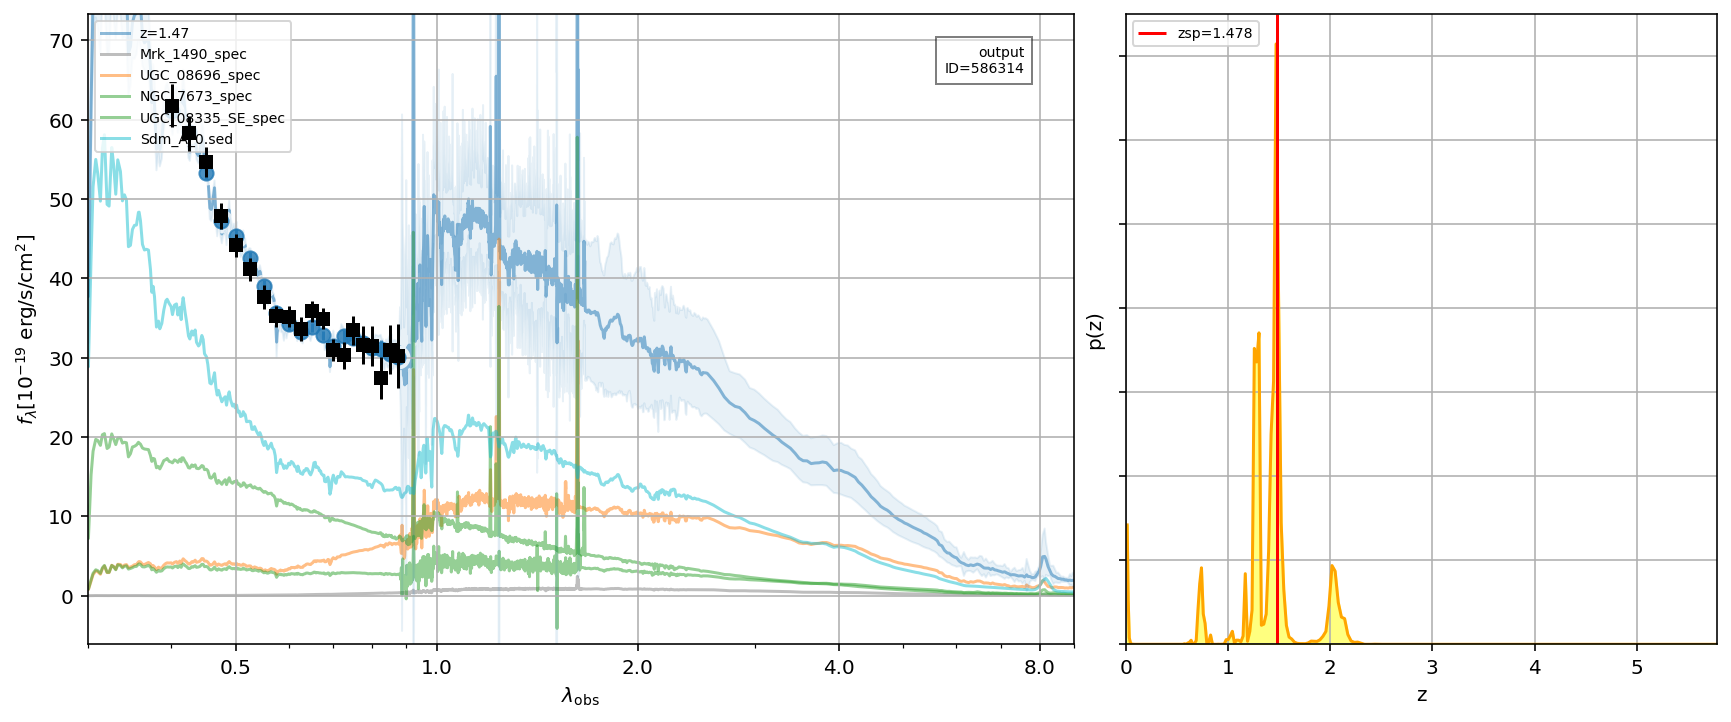

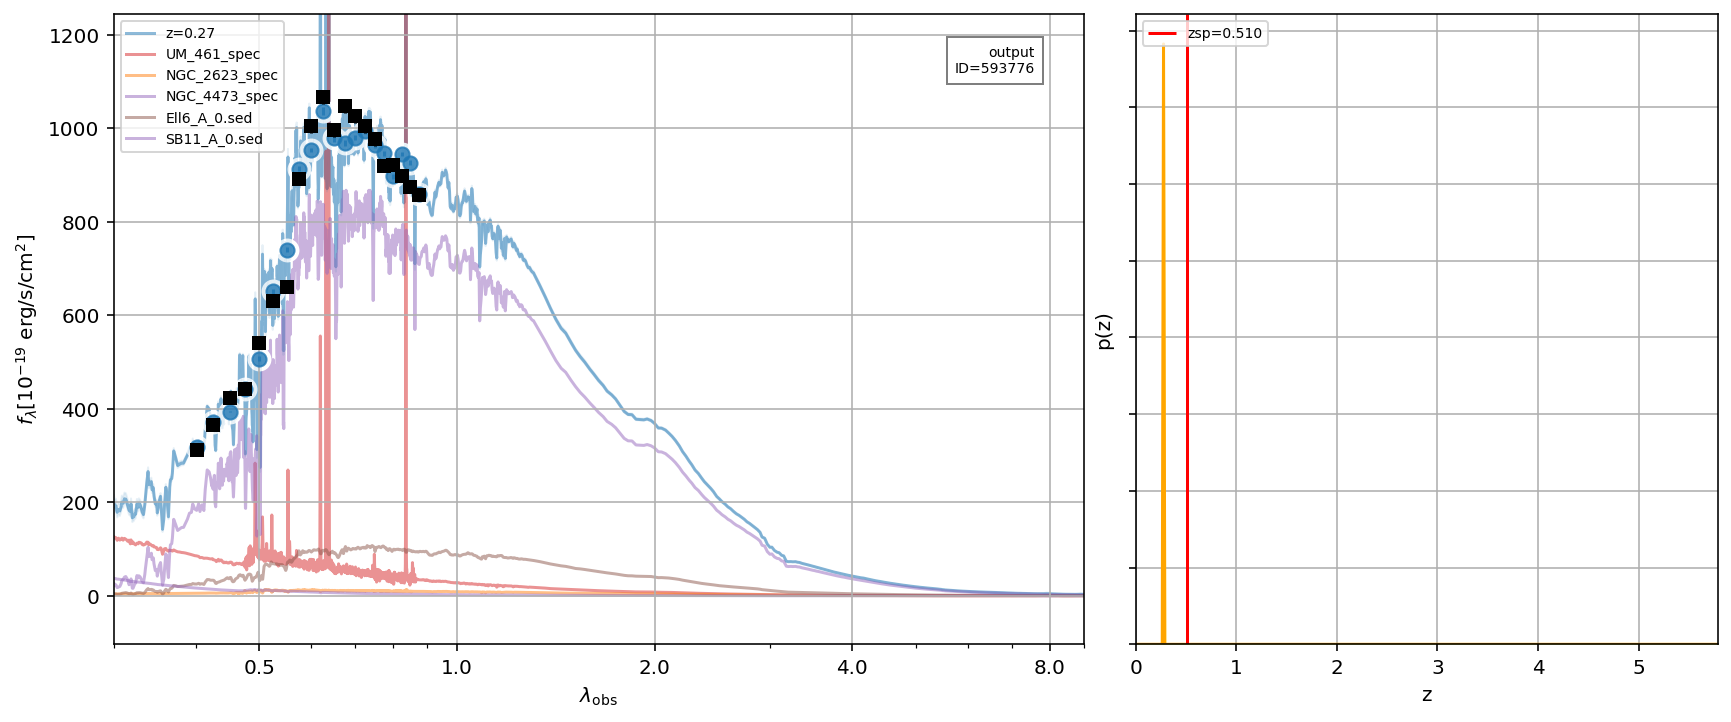

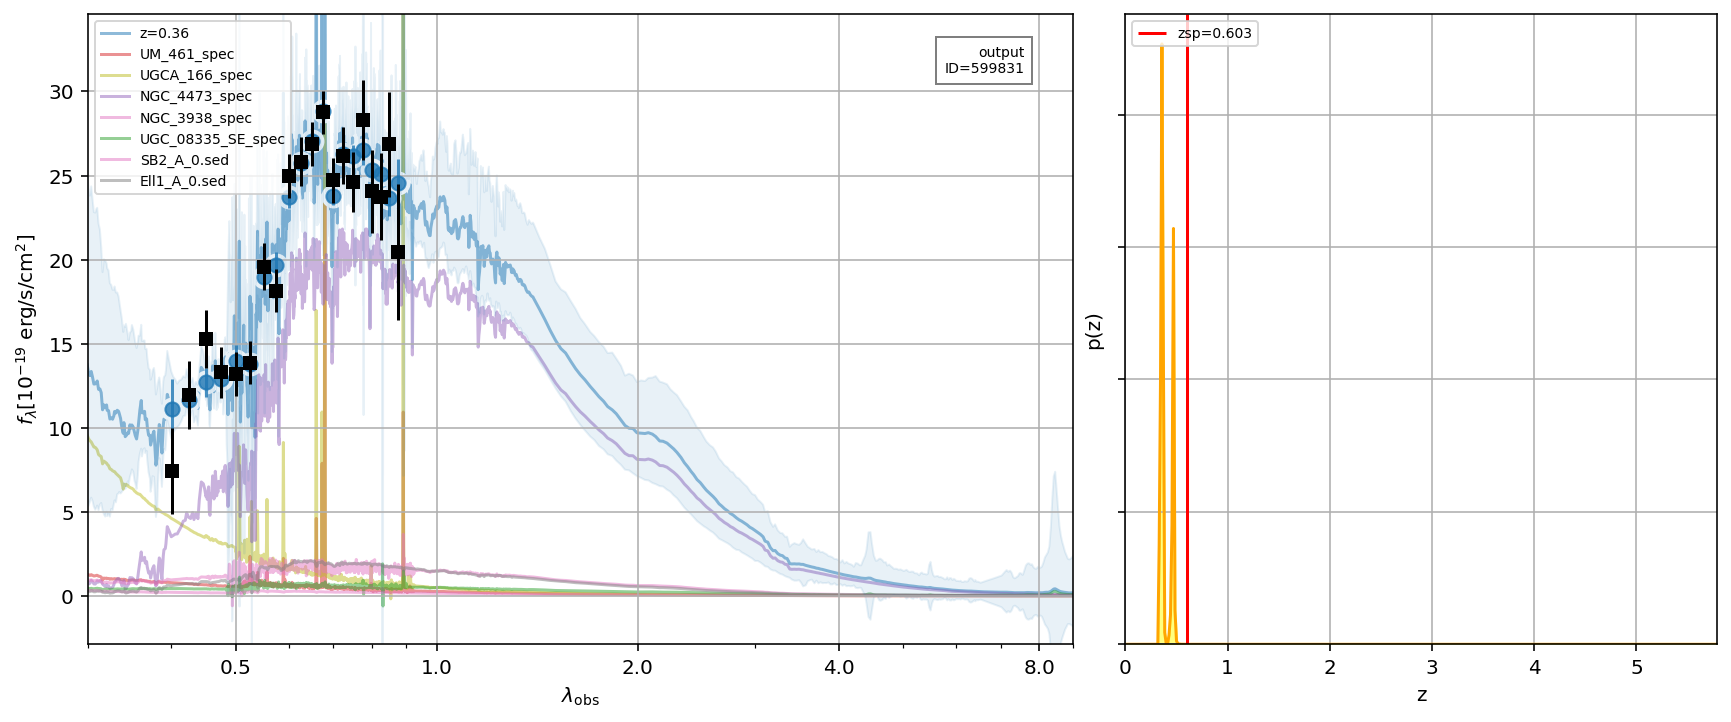

In [18]:
scheme = 'IMS'
base = Table.read(WD/'output'/f'output_{scheme}'/'result.fits')

imask = (base['HSC_i_MAG'] < 22) & (base['HSC_i_MAG'] > 18)
omask = (base['z_spec'] - base['z_phot']) / (1 + base['z_spec']) > 0.15

ids = np.arange(len(base))[imask & omask]

params = params_IMS
with open('tempfilt_nored_001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

dir_output = Path(params['OUTPUT_DIRECTORY'])
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )

ez.fit_catalog(ids, n_proc=3, prior=False)
for objid in base['ID'][ids]:
    ez.show_fit(objid, figsize=(12, 5), show_components=True, )

In [19]:
def fit_and_save_result_noprior(params, tempfilt, rerun=False):
    start = time.time()
    dir_output = Path(params['OUTPUT_DIRECTORY'])

    for i in range(17):
        outtabpath = dir_output/f'output{i:02d}.fits'
        lnptabpath = dir_output/f'lnp{i:02d}.fits'
        
        if (outtabpath.exists() and lnptabpath.exists()) and (not rerun):
            print(f'{i}th batch already exists ==============')
        else:
            print(f'Fitting {i}th batch =====================')
            start_id = i * 10000
            end_id = (i+1) * 10000
            
            ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                                zeropoint_file=None, params=params, tempfilt=tempfilt, )
            
            if end_id > len(ez.idx):
                end_id = len(ez.idx)

            ez.fit_catalog(ez.idx[start_id:end_id], n_proc=16, prior=False)
            ez.fit_at_zbest(prior=False, nproc=1)
            
            try:
                zlimits = ez.pz_percentiles(percentiles=[2.5,16,50,84,97.5],
                                                oversample=5)
            except:
                print('Couldn\'t compute pz_percentiles')
                zlimits = np.zeros((ez.NOBJ, 5), dtype=ez.ARRAY_DTYPE) - 1
                
            tab = Table()
            tab['id'] = ez.OBJID
            tab['z_phot'] = ez.zbest
            tab['z_phot_chi2'] = ez.chi2_best
            tab['z025'] = zlimits[:,0]
            tab['z160'] = zlimits[:,1]
            tab['z500'] = zlimits[:,2]
            tab['z840'] = zlimits[:,3]
            tab['z975'] = zlimits[:,4]
            
            pit = ez.PIT(ez.ZSPEC)
            tab['pit'] = pit
            
            crps = get_crps(ez.ZSPEC[start_id:end_id], ez.zgrid, ez.lnp[start_id:end_id], ez.trdz)
            tab['crps'] = np.empty(len(tab), dtype=float)
            tab['crps'][start_id:end_id] = crps
            
            tab[start_id:end_id].write(outtabpath, overwrite=True)
            phdu = fits.PrimaryHDU(data=ez.lnp[start_id:end_id])
            gridhdu = fits.ImageHDU(data=ez.zgrid)
            hdul = fits.HDUList([phdu, gridhdu])
            hdul.writeto(lnptabpath, overwrite=True)
            del ez, tab, phdu, gridhdu, hdul
            gc.collect()
    
    incatpath = Path(params['CATALOG_FILE'])
    base = Table.read(incatpath)
    
    colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'pit', 'crps', 'id']
    for label in colnames:
        base[label] = np.empty(len(base), dtype=float)
        
    for i in range(17):
        start_id = i*10000
        end_id = (i+1)*10000 if i < 16 else len(base)
        
        outtab = Table.read(dir_output/f'output{i:02d}.fits')
        for label in colnames:
            base[label][start_id:end_id] = outtab[label]
    
    base.write(dir_output/'result.fits', overwrite=True)
    
    end = time.time()
    time_taken_hms = time.strftime('%H:%M:%S', time.gmtime(end-start))
    print(f'Finished in {time_taken_hms}')

In [20]:
params_IMS_noprior = params_IMS.copy()
dir_output = WD/"output"/"output_IMS_noprior"
dir_output.mkdir(parents=True, exist_ok=True)
params_IMS_noprior['OUTPUT_DIRECTORY'] = dir_output.as_posix()
params_IMS_noprior['APPLY_PRIOR'] = False

params_WFS_noprior = params_WFS.copy()
dir_output = WD/"output"/"output_WFS_noprior"
dir_output.mkdir(parents=True, exist_ok=True)
params_WFS_noprior['OUTPUT_DIRECTORY'] = dir_output.as_posix()
params_WFS_noprior['APPLY_PRIOR'] = False

params_RIS_noprior = params_RIS.copy()
dir_output = WD/"output"/"output_RIS_noprior"
dir_output.mkdir(parents=True, exist_ok=True)
params_RIS_noprior['OUTPUT_DIRECTORY'] = dir_output.as_posix()
params_RIS_noprior['APPLY_PRIOR'] = False

In [21]:
fit_and_save_result_noprior(params_IMS_noprior, tempfilt)

Fitting 0th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)


/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 26.89it/s]
100%|██████████| 191/191 [00:20<00:00,  9.12it/s]


Compute best fits
fit_best: 2.7 s (n_proc=1,  NOBJ=9868)
Fit 25.2 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9868)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5305.50it/s]


Fitting 1th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 26.84it/s]
100%|██████████| 191/191 [00:20<00:00,  9.31it/s]


Compute best fits
fit_best: 2.8 s (n_proc=1,  NOBJ=9894)
Fit 29.5 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9894)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5173.41it/s]


Fitting 2th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 25.73it/s]
100%|██████████| 191/191 [00:20<00:00,  9.15it/s]


Compute best fits
fit_best: 3.0 s (n_proc=1,  NOBJ=9869)
Fit 26.5 s (n_proc=16, NOBJ=10000)
fit_best: 2.8 s (n_proc=1,  NOBJ=9869)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5639.30it/s]


Fitting 3th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 26.29it/s]
100%|██████████| 191/191 [00:21<00:00,  8.94it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9877)
Fit 25.5 s (n_proc=16, NOBJ=10000)
fit_best: 3.1 s (n_proc=1,  NOBJ=9877)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5723.98it/s]


Fitting 4th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.76it/s]
100%|██████████| 191/191 [00:21<00:00,  8.90it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9871)
Fit 25.6 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9871)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4768.72it/s]


Fitting 5th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 31.28it/s]
100%|██████████| 191/191 [00:21<00:00,  8.77it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9872)
Fit 26.0 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9872)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5770.08it/s]


Fitting 6th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.35it/s]
100%|██████████| 191/191 [00:21<00:00,  8.99it/s]


Compute best fits
fit_best: 2.7 s (n_proc=1,  NOBJ=9877)
Fit 25.5 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9877)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5450.15it/s]


Fitting 7th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.72it/s]
100%|██████████| 191/191 [00:21<00:00,  9.07it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9865)
Fit 25.3 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9865)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4767.09it/s]


Fitting 8th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.07it/s]
100%|██████████| 191/191 [00:20<00:00,  9.18it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9879)
Fit 25.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9879)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5136.94it/s]


Fitting 9th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.10it/s]
100%|██████████| 191/191 [00:21<00:00,  8.73it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9882)
Fit 26.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9882)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6018.91it/s]


Fitting 10th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.51it/s]
100%|██████████| 191/191 [00:21<00:00,  8.69it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9887)
Fit 26.2 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9887)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5492.43it/s]


Fitting 11th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.09it/s]
100%|██████████| 191/191 [00:21<00:00,  8.74it/s]


Compute best fits
fit_best: 2.7 s (n_proc=1,  NOBJ=9877)
Fit 26.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.9 s (n_proc=1,  NOBJ=9877)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4806.15it/s]


Fitting 12th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 29.88it/s]
100%|██████████| 191/191 [00:20<00:00,  9.21it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9851)
Fit 25.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9851)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4706.99it/s]


Fitting 13th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 29.82it/s]
100%|██████████| 191/191 [00:20<00:00,  9.34it/s]


Compute best fits
fit_best: 2.7 s (n_proc=1,  NOBJ=9870)
Fit 24.7 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9870)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4607.33it/s]


Fitting 14th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.43it/s]
100%|██████████| 191/191 [00:21<00:00,  8.81it/s]


Compute best fits
fit_best: 2.6 s (n_proc=1,  NOBJ=9879)
Fit 26.0 s (n_proc=16, NOBJ=10000)
fit_best: 2.6 s (n_proc=1,  NOBJ=9879)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5864.11it/s]


Fitting 15th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.20it/s]
100%|██████████| 191/191 [00:23<00:00,  8.15it/s]


Compute best fits
fit_best: 3.0 s (n_proc=1,  NOBJ=9875)
Fit 28.3 s (n_proc=16, NOBJ=10000)
fit_best: 2.7 s (n_proc=1,  NOBJ=9875)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6000.22it/s]


Fitting 16th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_IMS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.90it/s]
100%|██████████| 191/191 [00:12<00:00, 15.82it/s]


Compute best fits
fit_best: 1.6 s (n_proc=1,  NOBJ=5976)
Fit 15.3 s (n_proc=16, NOBJ=6041)
fit_best: 1.6 s (n_proc=1,  NOBJ=5976)


Calculating CRPS: 100%|██████████| 6041/6041 [00:01<00:00, 4736.18it/s]


Finished in 00:12:29


In [22]:
fit_and_save_result_noprior(params_WFS_noprior, tempfilt)

Fitting 0th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 25.92it/s]
100%|██████████| 191/191 [00:19<00:00,  9.60it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9664)
Fit 24.2 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9664)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5337.43it/s]


Fitting 1th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 27.34it/s]
100%|██████████| 191/191 [00:19<00:00,  9.80it/s]


Compute best fits
fit_best: 2.4 s (n_proc=1,  NOBJ=9624)
Fit 23.8 s (n_proc=16, NOBJ=10000)
fit_best: 2.4 s (n_proc=1,  NOBJ=9624)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5310.82it/s]


Fitting 2th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:08, 23.85it/s]
100%|██████████| 191/191 [00:20<00:00,  9.55it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9693)
Fit 24.4 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9693)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5466.16it/s]


Fitting 3th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 27.43it/s]
100%|██████████| 191/191 [00:19<00:00,  9.71it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9672)
Fit 23.9 s (n_proc=16, NOBJ=10000)
fit_best: 2.4 s (n_proc=1,  NOBJ=9672)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5382.45it/s]


Fitting 4th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 26.69it/s]
100%|██████████| 191/191 [00:20<00:00,  9.55it/s]


Compute best fits
fit_best: 2.9 s (n_proc=1,  NOBJ=9685)
Fit 24.9 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9685)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5072.29it/s]


Fitting 5th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.23it/s]
100%|██████████| 191/191 [00:18<00:00, 10.07it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9641)
Fit 28.9 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9641)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5128.27it/s]


Fitting 6th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.61it/s]
100%|██████████| 191/191 [00:19<00:00,  9.95it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9669)
Fit 23.4 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9669)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6486.25it/s]


Fitting 7th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.10it/s]
100%|██████████| 191/191 [00:18<00:00, 10.24it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9682)
Fit 25.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9682)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6217.97it/s]


Fitting 8th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:07, 24.39it/s]
100%|██████████| 191/191 [00:18<00:00, 10.26it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9679)
Fit 22.8 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9679)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6253.56it/s]


Fitting 9th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.87it/s]
100%|██████████| 191/191 [00:18<00:00, 10.09it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9688)
Fit 26.0 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9688)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6167.67it/s]


Fitting 10th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.90it/s]
100%|██████████| 191/191 [00:18<00:00, 10.31it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9649)
Fit 22.7 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9649)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5220.12it/s]


Fitting 11th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 33.98it/s]
100%|██████████| 191/191 [00:19<00:00,  9.86it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9690)
Fit 23.4 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9690)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5130.83it/s]


Fitting 12th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.27it/s]
100%|██████████| 191/191 [00:18<00:00, 10.13it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9682)
Fit 28.3 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9682)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6381.77it/s]


Fitting 13th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 28.30it/s]
100%|██████████| 191/191 [00:19<00:00,  9.63it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9638)
Fit 24.7 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9638)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6278.95it/s]


Fitting 14th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 33.39it/s]
100%|██████████| 191/191 [00:18<00:00, 10.31it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9680)
Fit 22.7 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9680)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6338.78it/s]


Fitting 15th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 31.37it/s]
100%|██████████| 191/191 [00:18<00:00, 10.09it/s]


Compute best fits
fit_best: 2.3 s (n_proc=1,  NOBJ=9650)
Fit 25.7 s (n_proc=16, NOBJ=10000)
fit_best: 2.3 s (n_proc=1,  NOBJ=9650)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6004.49it/s]


Fitting 16th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_WFS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 33.40it/s]
100%|██████████| 191/191 [00:11<00:00, 16.98it/s]


Compute best fits
fit_best: 1.4 s (n_proc=1,  NOBJ=5841)
Fit 14.4 s (n_proc=16, NOBJ=6041)
fit_best: 1.6 s (n_proc=1,  NOBJ=5841)


Calculating CRPS: 100%|██████████| 6041/6041 [00:01<00:00, 5789.07it/s]


Finished in 00:12:01


In [23]:
fit_and_save_result_noprior(params_RIS_noprior, tempfilt)

Fitting 0th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.93it/s]
100%|██████████| 191/191 [00:14<00:00, 12.79it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8820)
Fit 22.2 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8820)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5307.23it/s]


Fitting 1th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 33.76it/s]
100%|██████████| 191/191 [00:15<00:00, 12.66it/s]


Compute best fits
fit_best: 1.9 s (n_proc=1,  NOBJ=8844)
Fit 18.8 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8844)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5202.61it/s]


Fitting 2th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 33.64it/s]
100%|██████████| 191/191 [00:15<00:00, 12.56it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8866)
Fit 18.8 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8866)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5310.42it/s]


Fitting 3th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 34.12it/s]
100%|██████████| 191/191 [00:14<00:00, 12.82it/s]


Compute best fits
fit_best: 2.0 s (n_proc=1,  NOBJ=8817)
Fit 20.1 s (n_proc=16, NOBJ=10000)
fit_best: 2.1 s (n_proc=1,  NOBJ=8817)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5257.31it/s]


Fitting 4th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 31.99it/s]
100%|██████████| 191/191 [00:15<00:00, 12.63it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8810)
Fit 18.9 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8810)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5321.19it/s]


Fitting 5th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.35it/s]
100%|██████████| 191/191 [00:16<00:00, 11.86it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8858)
Fit 24.6 s (n_proc=16, NOBJ=10000)
fit_best: 1.9 s (n_proc=1,  NOBJ=8858)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 6510.97it/s]


Fitting 6th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.13it/s]
100%|██████████| 191/191 [00:15<00:00, 12.54it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8806)
Fit 27.2 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8806)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5326.90it/s]


Fitting 7th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.79it/s]
100%|██████████| 191/191 [00:15<00:00, 12.55it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8847)
Fit 20.8 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8847)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5315.74it/s]


Fitting 8th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.12it/s]
100%|██████████| 191/191 [00:15<00:00, 12.35it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8886)
Fit 20.4 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8886)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5287.52it/s]


Fitting 9th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.98it/s]
100%|██████████| 191/191 [00:15<00:00, 12.47it/s]


Compute best fits
fit_best: 1.9 s (n_proc=1,  NOBJ=8827)
Fit 22.3 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8827)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 4965.66it/s]


Fitting 10th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.05it/s]
100%|██████████| 191/191 [00:15<00:00, 12.35it/s]


Compute best fits
fit_best: 1.9 s (n_proc=1,  NOBJ=8883)
Fit 19.5 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8883)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5265.55it/s]


Fitting 11th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 31.21it/s]
100%|██████████| 191/191 [00:15<00:00, 12.27it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8832)
Fit 22.3 s (n_proc=16, NOBJ=10000)
fit_best: 2.0 s (n_proc=1,  NOBJ=8832)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 3738.07it/s]


Fitting 12th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.94it/s]
100%|██████████| 191/191 [00:14<00:00, 12.82it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8850)
Fit 19.7 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8850)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5986.91it/s]


Fitting 13th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.99it/s]
100%|██████████| 191/191 [00:14<00:00, 12.77it/s]


Compute best fits
fit_best: 1.9 s (n_proc=1,  NOBJ=8841)
Fit 20.5 s (n_proc=16, NOBJ=10000)
fit_best: 2.0 s (n_proc=1,  NOBJ=8841)


Calculating CRPS: 100%|██████████| 10000/10000 [00:02<00:00, 3494.99it/s]


Fitting 14th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.63it/s]
100%|██████████| 191/191 [00:15<00:00, 12.50it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=8847)
Fit 23.6 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8847)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5859.53it/s]


Fitting 15th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:05, 32.97it/s]
100%|██████████| 191/191 [00:15<00:00, 12.49it/s]


Compute best fits
fit_best: 2.0 s (n_proc=1,  NOBJ=8911)
Fit 20.2 s (n_proc=16, NOBJ=10000)
fit_best: 1.8 s (n_proc=1,  NOBJ=8911)


Calculating CRPS: 100%|██████████| 10000/10000 [00:01<00:00, 5255.72it/s]


Fitting 16th batch =====================
Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS.csv
   >>> NOBJ = 166041
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  prior_R_zmax7.dat


191it [00:06, 30.61it/s]
100%|██████████| 191/191 [00:09<00:00, 20.53it/s]


Compute best fits
fit_best: 1.1 s (n_proc=1,  NOBJ=5356)
Fit 12.3 s (n_proc=16, NOBJ=6041)
fit_best: 1.1 s (n_proc=1,  NOBJ=5356)


Calculating CRPS: 100%|██████████| 6041/6041 [00:00<00:00, 6729.50it/s]


Finished in 00:10:45
